In [1]:
!pip install torch

  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.14.0
    Uninstalling sympy-1.14.0:
      Successfully uninstalled sympy-1.14.0


In [7]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.0 kB/s  0:04:22a 0:00:02m eta 0:00:06m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]━━━━━━━━━━━ 2/3 [pandas]


In [9]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.2 kB/s  0:05:29 eta 0:00:010:00:07
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 49.6 kB/s  0:03:02 44.9 kB/s eta 0:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 kB/s  0:01:15 12.8 kB/s eta 0:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib] 5/6 [matplotlib]


In [1]:
!pip install seaborn

In [3]:
import sys
print(sys.executable)



/home/bioinforuser06/anaconda3/envs/machine_learning/bin/python


In [4]:
!{sys.executable} -m pip list | grep torch


In [ ]:
# Install compatible PyTorch 2.5.1 (CPU)
!{sys.executable} -m pip install torch==2.5.1 torchaudio==2.5.1 torchvision==0.20.1

  Using cached torch-2.5.1-cp310-cp310-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchaudio-2.5.1-cp310-cp310-manylinux1_x86_64.whl.metadata (6.4 kB)
  Using cached torchvision-0.20.1-cp310-cp310-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_6

In [2]:
!{sys.executable} -m pip list | grep torch


/bin/bash: line 1: {sys.executable}: command not found


In [3]:
!pip install openpyxl

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


2026-02-17 13:46:17.641553: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-17 13:46:17.675241: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-17 13:46:18.546951: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [4]:
# Load the Excel file and check the sheet names
excel_path = "Subject1.xlsx"
xls = pd.ExcelFile(excel_path)
sheet_names = xls.sheet_names

sheet_names

['CGM', 'Bolus']

In [5]:
df_cgm = pd.read_excel(excel_path, sheet_name='CGM')
print(df_cgm.columns)


Index(['date', 'mg/dl'], dtype='object')


In [6]:
import pandas as pd

def load_and_prepare_data(excel_path: str):
    """Load CGM and Bolus data from Excel and clean them."""

    # Load sheets
    df_cgm = pd.read_excel(excel_path, sheet_name="CGM")
    df_bolus = pd.read_excel(excel_path, sheet_name="Bolus", parse_dates=["date"])

    # Clean CGM data
    df_cgm = (
        df_cgm.rename(columns={"mg/dl": "glucose"})
              .assign(glucose=lambda d: pd.to_numeric(d["glucose"], errors="coerce"),
                      date=lambda d: pd.to_datetime(d["date"], errors="coerce"))
              .sort_values("date")
    )

    # Interpolate missing dates (if at least 2 valid dates exist)
    if df_cgm["date"].notnull().sum() >= 2 and df_cgm["date"].isnull().any():
        df_cgm["date"] = (
            df_cgm["date"].astype("int64")
            .interpolate()
            .astype("int64")
            .astype("datetime64[ns]")
        )

    # Clean Bolus data
    df_bolus = df_bolus.dropna(subset=["date"]).sort_values("date")

    # Quick summary
    print("✅ CGM: {} rows | Null dates: {} | Range: {} → {}".format(
        len(df_cgm),
        df_cgm["date"].isnull().sum(),
        df_cgm["date"].min(),
        df_cgm["date"].max()
    ))

    print("✅ Bolus: {} rows | Range: {} → {}".format(
        len(df_bolus),
        df_bolus["date"].min(),
        df_bolus["date"].max()
    ))

    return df_cgm, df_bolus
df_cgm, df_bolus = load_and_prepare_data(excel_path)

✅ CGM: 462400 rows | Null dates: 0 | Range: 2015-12-01 21:01:07.925000 → 2021-11-18 23:56:52
✅ Bolus: 1112 rows | Range: 2021-07-18 16:48:04 → 2021-11-18 22:17:36


In [7]:
# Align CGM with Bolus date range
start_date, end_date = df_bolus["date"].min(), df_bolus["date"].max()

df_cgm_filtered = df_cgm.query("@start_date <= date <= @end_date")

print("✅ CGM aligned to Bolus:")
print("Rows:", df_cgm_filtered.shape[0])
print("Range:", df_cgm_filtered["date"].min(), "→", df_cgm_filtered["date"].max())


✅ CGM aligned to Bolus:
Rows: 52179
Range: 2021-07-18 16:50:03 → 2021-11-18 22:16:51


In [8]:
print(df_bolus['date'].min(), df_bolus['date'].max())
print(df_cgm_filtered['date'].min(), df_cgm_filtered['date'].max())

2021-07-18 16:48:04 2021-11-18 22:17:36
2021-07-18 16:50:03 2021-11-18 22:16:51


In [9]:


# -------------------------------
# Helpers
# -------------------------------
def estimate_meal_size(carb: float) -> str:
    if pd.isna(carb) or carb == 0:
        return "none"
    elif carb <= 30:
        return "small"
    elif carb <= 60:
        return "medium"
    return "large"

def likely_active(hour: int) -> int:
    return int(6 <= hour <= 9 or 16 <= hour <= 19)

def add_iob_cib(df, insulin_duration=4, carb_coverage_factor=12, clip_cib=50):
    """Compute Insulin on Board (IOB) and Carbs in Body (CIB)."""
    df = df.copy()
    iob = np.zeros(len(df))

    for i in range(1, len(df)):
        delta_t = (df["date"].iloc[i] - df["date"].iloc[i-1]).total_seconds() / 3600
        decay = np.exp(-delta_t / insulin_duration) if delta_t > 0 else 1
        iob[i] = iob[i-1] * decay + df["normal"].iloc[i]

    df["IOB"] = iob
    df["CIB"] = df["carbInput"] - (df["normal"] * carb_coverage_factor)
    if clip_cib:
        df["CIB"] = df["CIB"].clip(-clip_cib, clip_cib)

    df["IOB_decay"] = df["IOB"].ewm(halflife=30).mean()
    df["CIB_trend"] = df["CIB"].diff().fillna(0)
    return df

def engineer_iob_cib_features(df, iob_col="IOB", cib_col="CIB", span=12):
    """
    Adds advanced IOB & CIB features for LSTM.
    span = smoothing factor (~span*5min = half-life).
    """
    df = df.copy()

    # 1. Event flags
    df["had_insulin"] = (df[iob_col] > 0).astype(int)
    df["had_carb"] = (df[cib_col] != 0).astype(int)

    # 2. Smoothed features
    df["IOB_smooth"] = df[iob_col].ewm(span=span, adjust=False).mean()
    df["CIB_smooth"] = df[cib_col].ewm(span=span, adjust=False).mean()

    # 3. Interaction
    df["net_effect"] = df[iob_col] - df[cib_col]

    # 4. Buckets
    df["IOB_level"] = pd.cut(
        df[iob_col],
        bins=[-0.1, 0, 10, 40, np.inf],
        labels=["none", "low", "medium", "high"]
    )
    df["CIB_status"] = pd.cut(
        df[cib_col],
        bins=[-np.inf, -1, 1, np.inf],
        labels=["carb_dominant", "balanced", "insulin_dominant"]
    )

    # 5. One-hot encoding for categorical features
    df = pd.get_dummies(df, columns=["IOB_level", "CIB_status"], prefix=["IOB", "CIB"])

    return df

def clean_for_model(df, sparse_thresh=0.95):
    """Prepare final matrix for ML models."""
    df = df.copy()

    # Drop intermediate timestamps
    df.drop(columns=["last_meal_time", "last_insulin_time"], inplace=True, errors="ignore")

    # Convert bool → int
    bool_cols = df.select_dtypes("bool").columns
    df[bool_cols] = df[bool_cols].astype(int)

    # Drop very sparse cols
    sparse_cols = df.columns[df.isnull().mean() > sparse_thresh]
    df.drop(columns=sparse_cols, inplace=True)

    # Fill remaining NaNs
    df = df.fillna(0)

    return df





In [10]:
# -------------------------------
# Main Feature Engineering Pipeline
# -------------------------------
def engineer_features(df_cgm, df_bolus,
                      insulin_duration=4, carb_coverage_factor=12, clip_cib=50,
                      iob_span=12):
    df = df_cgm.copy()

    # --- 0. Clean inputs ---
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df_bolus["date"] = pd.to_datetime(df_bolus["date"], errors="coerce")
    df.dropna(subset=["date"], inplace=True)
    df_bolus.dropna(subset=["date"], inplace=True)

    # --- 1. Glucose dynamics ---
    df["glucose_change"] = df["glucose"].diff()
    df["glucose_t-1"] = df["glucose"].shift(1)

    # --- 2. Time-based features ---
    df["hour"] = df["date"].dt.hour
    df["minute"] = df["date"].dt.minute
    df["day_of_week"] = df["date"].dt.dayofweek

    # Cyclical encoding
    df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
    df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)
    df["minute_sin"] = np.sin(2 * np.pi * df["minute"] / 60)
    df["minute_cos"] = np.cos(2 * np.pi * df["minute"] / 60)
    df["day_sin"] = np.sin(2 * np.pi * df["day_of_week"] / 7)
    df["day_cos"] = np.cos(2 * np.pi * df["day_of_week"] / 7)

    df["weekend"] = df["day_of_week"].isin([5, 6]).astype(int)
    df["night"] = ((df["hour"] >= 22) | (df["hour"] < 6)).astype(int)

    # --- 3. Prediction target ---
    df["target"] = df["glucose"].shift(-6)  # 30min ahead

    # --- 4. Merge Bolus ---
    df = pd.merge_asof(
        df.sort_values("date"),
        df_bolus.sort_values("date"),
        on="date",
        direction="nearest",
        tolerance=pd.Timedelta("5min")
    )

    # --- 5. Fill NaNs ---
    df["normal"] = df["normal"].fillna(0)
    df["carbInput"] = df["carbInput"].fillna(0)
    df["bgInput"] = df["bgInput"].fillna(df["glucose"])
    df["targetBloodGlucose"] = df["targetBloodGlucose"].fillna(110)

    # --- 6. Meal features ---
    df["meal_size"] = df["carbInput"].apply(estimate_meal_size)
    df = pd.get_dummies(df, columns=["meal_size"], prefix="meal")

    # --- 7. Time since last meal/insulin ---
    df["last_meal_time"] = df["date"].where(df["carbInput"] > 0)
    df["last_insulin_time"] = df["date"].where(df["normal"] > 0)

    df["time_since_meal"] = (
        (df["date"] - df["last_meal_time"].ffill()).dt.total_seconds() / 3600
    )
    df["time_since_insulin"] = (
        (df["date"] - df["last_insulin_time"].ffill()).dt.total_seconds() / 3600
    )

    # --- 8. Gaps & activity ---
    df["glucose_gap"] = df["bgInput"] - df["targetBloodGlucose"]
    df["bg_drop"] = df["glucose_t-1"] - df["glucose"]

    df["recent_insulin"] = (df["time_since_insulin"] < 2).astype(int)
    df["possible_activity"] = ((df["bg_drop"] > 10) & (df["recent_insulin"] == 0)).astype(int)

    df["likely_active"] = df["hour"].apply(likely_active)
    df["activity_score"] = 0.5 * df["possible_activity"] + 0.5 * df["likely_active"]

    # --- 9. IOB & CIB ---
    df = add_iob_cib(df, insulin_duration, carb_coverage_factor, clip_cib)

    # --- 10. Advanced IOB/CIB features ---
    df = engineer_iob_cib_features(df, iob_col="IOB", cib_col="CIB", span=iob_span)

    # --- 11. Final cleaning ---
    df.dropna(subset=["glucose", "target"], inplace=True)
    df = clean_for_model(df)

    return df

df_features = engineer_features(df_cgm_filtered, df_bolus,
                      insulin_duration=4, carb_coverage_factor=12, clip_cib=50,
                      iob_span=12)

In [11]:
df_features.head()

,date,glucose,glucose_change,glucose_t-1,hour,minute,day_of_week,hour_sin,hour_cos,minute_sin,...,IOB_smooth,CIB_smooth,net_effect,IOB_none,IOB_low,IOB_medium,IOB_high,CIB_carb_dominant,CIB_balanced,CIB_insulin_dominant
0,2021-07-18 16:50:03,146,0.0,0.0,16,50,6,-0.866025,-0.500000,-0.866025,...,0.0,-19.716000,19.716,1,0,0,0,1,0,0
1,2021-07-18 16:55:04,156,10.0,146.0,16,55,6,-0.866025,-0.500000,-0.500000,...,0.0,-16.682769,0.000,1,0,0,0,0,1,0
2,2021-07-18 17:00:04,172,16.0,156.0,17,0,6,-0.965926,-0.258819,0.000000,...,0.0,-14.116189,0.000,1,0,0,0,0,1,0
3,2021-07-18 17:05:03,183,11.0,172.0,17,5,6,-0.965926,-0.258819,0.500000,...,0.0,-11.944468,0.000,1,0,0,0,0,1,0
4,2021-07-18 17:10:04,199,16.0,183.0,17,10,6,-0.965926,-0.258819,0.866025,...,0.0,-10.106857,0.000,1,0,0,0,0,1,0


In [12]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52173 entries, 0 to 52172
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      52173 non-null  datetime64[ns]
 1   glucose                   52173 non-null  int64         
 2   glucose_change            52173 non-null  float64       
 3   glucose_t-1               52173 non-null  float64       
 4   hour                      52173 non-null  int32         
 5   minute                    52173 non-null  int32         
 6   day_of_week               52173 non-null  int32         
 7   hour_sin                  52173 non-null  float64       
 8   hour_cos                  52173 non-null  float64       
 9   minute_sin                52173 non-null  float64       
 10  minute_cos                52173 non-null  float64       
 11  day_sin                   52173 non-null  float64       
 12  day_cos                

In [13]:

print(df_features[['glucose', 'target', 'IOB', 'CIB']].head())


   glucose  target  IOB     CIB
0      146   226.0  0.0 -19.716
1      156   234.0  0.0   0.000
2      172   242.0  0.0   0.000
3      183   257.0  0.0   0.000
4      199   263.0  0.0   0.000


In [14]:
df_features.loc[: ,('IOB','CIB')].value_counts()

IOB        CIB
0.000000   0.0    6
28.151479  0.0    2
26.445867  0.0    2
25.366597  0.0    2
30.597957  0.0    2
                 ..
8.618381   0.0    1
8.618632   0.0    1
8.619326   0.0    1
8.619327   0.0    1
8.610613   0.0    1
Name: count, Length: 52162, dtype: int64

# we want to split the data so we don't 30% of the data then use this 30% to do meta learning and transfer learning 

In [15]:


#splitiing data on dates
#sort dates
df_features['date'] = pd.to_datetime(df_features['date'])
df_features = df_features.sort_values('date').reset_index(drop=True)

#split
T0 = df_features['date'].min()
H_end = T0 + pd.Timedelta(days=90)
G_end = T0 + pd.Timedelta(days=120)

first_3_months = df_features[df_features['date'] < H_end]
gap = df_features[
    (df_features['date'] >= H_end) &
    (df_features['date'] < G_end)
]
recent_week = df_features[df_features['date'] >= G_end]


print("H:", first_3_months.date.min(), first_3_months.date.max())
print("G:", gap.date.min(), gap.date.max())
print("R:", recent_week.date.min(), recent_week.date.max())


H: 2021-07-18 16:50:03 2021-10-16 16:48:40
G: 2021-10-16 16:51:36 2021-11-15 16:46:50
R: 2021-11-15 16:51:49 2021-11-18 21:46:51


In [16]:

def normalize_features(df, feature_cols, unscaled_cols):
    """
    Normalizes selected numeric features using MinMaxScaler.

    Args:
        df (pd.DataFrame): DataFrame to normalize.
        feature_cols (list): Column names to scale.
        unscaled_cols (list): Columns to leave unchanged and append back.

    Returns:
        df_final (pd.DataFrame): DataFrame with scaled and unscaled features.
        scaler (MinMaxScaler): Fitted scaler for inverse transforms or deployment.
    """
    # Make a copy to avoid modifying original
    df_scaled = df.copy()

    # Fit scaler to selected numeric features
    scaler = MinMaxScaler()
    df_scaled[feature_cols] = scaler.fit_transform(df_scaled[feature_cols])

    # Add back unscaled columns if not already in df_scaled
    df_unscaled = df[unscaled_cols].copy()
    df_final = pd.concat([df_scaled[feature_cols], df_unscaled], axis=1)

    return df_final, scaler

In [17]:
# -------------------------------
# Feature column groups
# -------------------------------
feature_cols = [
    # Glucose & dynamics
    "glucose", "glucose_change", "glucose_t-1",
    "glucose_gap", "bg_drop",
    
    # Time-based
    "hour", "day_of_week",
    "hour_sin", "hour_cos",
    "minute_sin", "minute_cos",   # ✅ Added here
    "day_sin", "day_cos",
    
    # Bolus & carb info
    "normal", "carbInput", "bgInput",
    "targetBloodGlucose", "insulinSensitivityFactor",
    
    # Meal/insulin timing
    "time_since_meal", "time_since_insulin",
    
    # Activity
    "activity_score",
    
    # IOB/CIB engineered
    "IOB", "CIB", "IOB_decay", "CIB_trend",
    
    # Prediction target
    "target"
]

df_unscaled = [
    "weekend", "night",
    # Categorical (dummies)
    "meal_large", "meal_medium", "meal_none", "meal_small",
    
    # Event flags
    "recent_insulin", "possible_activity", "likely_active",
    
    # Metadata
    "date"
]


df_scaled_1, scaler = normalize_features(first_3_months, feature_cols, df_unscaled )

In [18]:
# recent weeks normilization
def transform_features(df, feature_cols, unscaled_cols, scaler):
    """
    Transforms new data using a pre-fitted scaler.

    Args:
        df (pd.DataFrame): DataFrame to transform.
        feature_cols (list): Columns to scale (must match scaler).
        unscaled_cols (list): Columns to leave unchanged.
        scaler (MinMaxScaler): Already fitted scaler.

    Returns:
        df_final (pd.DataFrame): DataFrame with scaled + unscaled columns
    """
    df_scaled = df.copy()
    df_scaled[feature_cols] = scaler.transform(df_scaled[feature_cols])
    
    df_unscaled_part = df[unscaled_cols].copy()
    df_final = pd.concat([df_scaled[feature_cols], df_unscaled_part], axis=1)
    
    return df_final
    
recent_week_scaled = transform_features(recent_week, feature_cols, df_unscaled, scaler)


In [19]:
recent_week_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 51251 to 52172
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   glucose                   922 non-null    float64       
 1   glucose_change            922 non-null    float64       
 2   glucose_t-1               922 non-null    float64       
 3   glucose_gap               922 non-null    float64       
 4   bg_drop                   922 non-null    float64       
 5   hour                      922 non-null    float64       
 6   day_of_week               922 non-null    float64       
 7   hour_sin                  922 non-null    float64       
 8   hour_cos                  922 non-null    float64       
 9   minute_sin                922 non-null    float64       
 10  minute_cos                922 non-null    float64       
 11  day_sin                   922 non-null    float64       
 12  day_cos              

In [20]:
def optimize_dataframe(df):
    df_optimized = df.copy()

    # Convert float64 to float32
    float_cols = df_optimized.select_dtypes(include=['float64']).columns
    df_optimized[float_cols] = df_optimized[float_cols].astype('float32')

    # Convert int64 to int32
    int_cols = df_optimized.select_dtypes(include=['int64']).columns
    df_optimized[int_cols] = df_optimized[int_cols].astype('int32')

    # Convert datetime to Unix timestamp (int)
    if 'date' in df_optimized.columns:
        df_optimized['date'] = df_optimized['date'].astype('int64') // 10**9

        # Convert boolean to int
    bool_cols = df_optimized.select_dtypes(include='bool').columns
    df_optimized[bool_cols] = df_optimized[bool_cols].astype('int32')


    return df_optimized
    
df_lstm_ready = optimize_dataframe(df_scaled_1)
# recent week optimization
recent_week_opt = optimize_dataframe(recent_week_scaled)

In [21]:
df_lstm_ready.head()

,glucose,glucose_change,glucose_t-1,glucose_gap,bg_drop,hour,day_of_week,hour_sin,hour_cos,minute_sin,...,weekend,night,meal_large,meal_medium,meal_none,meal_small,recent_insulin,possible_activity,likely_active,date
0,0.295580,0.292350,0.000000,0.157459,0.707650,0.695652,1.0,0.066987,0.25000,0.066987,...,1,0,0,0,1,0,1,0,1,1626627003
1,0.323204,0.319672,0.364090,0.323204,0.680328,0.695652,1.0,0.066987,0.25000,0.250000,...,1,0,0,0,1,0,1,0,1,1626627304
2,0.367403,0.336066,0.389027,0.367403,0.663934,0.739130,1.0,0.017037,0.37059,0.500000,...,1,0,0,0,1,0,1,0,1,1626627604
3,0.397790,0.322404,0.428928,0.397790,0.677596,0.739130,1.0,0.017037,0.37059,0.750000,...,1,0,0,0,1,0,1,0,1,1626627903
4,0.441989,0.336066,0.456359,0.441989,0.663934,0.739130,1.0,0.017037,0.37059,0.933013,...,1,0,0,0,1,0,1,0,1,1626628204


In [22]:
df_lstm_ready.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38220 entries, 0 to 38219
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glucose                   38220 non-null  float32
 1   glucose_change            38220 non-null  float32
 2   glucose_t-1               38220 non-null  float32
 3   glucose_gap               38220 non-null  float32
 4   bg_drop                   38220 non-null  float32
 5   hour                      38220 non-null  float32
 6   day_of_week               38220 non-null  float32
 7   hour_sin                  38220 non-null  float32
 8   hour_cos                  38220 non-null  float32
 9   minute_sin                38220 non-null  float32
 10  minute_cos                38220 non-null  float32
 11  day_sin                   38220 non-null  float32
 12  day_cos                   38220 non-null  float32
 13  normal                    38220 non-null  float32
 14  carbInput  

## RECENT WEEKS PREPOCESSING

In [23]:
recent_week_opt.head()

,glucose,glucose_change,glucose_t-1,glucose_gap,bg_drop,hour,day_of_week,hour_sin,hour_cos,minute_sin,...,weekend,night,meal_large,meal_medium,meal_none,meal_small,recent_insulin,possible_activity,likely_active,date
51251,0.234807,0.289617,0.311721,0.234807,0.710383,0.695652,0.0,0.066987,0.25000,0.095492,...,0,0,0,0,1,0,0,0,1,1636995109
51252,0.234807,0.292350,0.309227,0.234807,0.707650,0.695652,0.0,0.066987,0.25000,0.296632,...,0,0,0,0,1,0,0,0,1,1636995409
51253,0.232044,0.289617,0.309227,0.232044,0.710383,0.739130,0.0,0.017037,0.37059,0.552264,...,0,0,0,0,1,0,0,0,1,1636995710
51254,0.232044,0.292350,0.306733,0.232044,0.707650,0.739130,0.0,0.017037,0.37059,0.793893,...,0,0,0,0,1,0,0,0,1,1636996009
51255,0.256906,0.316940,0.306733,0.256906,0.683060,0.739130,0.0,0.017037,0.37059,0.956773,...,0,0,0,0,1,0,0,0,1,1636996309


In [24]:
recent_week_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 51251 to 52172
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glucose                   922 non-null    float32
 1   glucose_change            922 non-null    float32
 2   glucose_t-1               922 non-null    float32
 3   glucose_gap               922 non-null    float32
 4   bg_drop                   922 non-null    float32
 5   hour                      922 non-null    float32
 6   day_of_week               922 non-null    float32
 7   hour_sin                  922 non-null    float32
 8   hour_cos                  922 non-null    float32
 9   minute_sin                922 non-null    float32
 10  minute_cos                922 non-null    float32
 11  day_sin                   922 non-null    float32
 12  day_cos                   922 non-null    float32
 13  normal                    922 non-null    float32
 14  carbInput

In [25]:


# -----------------------------------
# Sequence creator for LSTM
# -----------------------------------
def create_lstm_sequences_fast(df, feature_cols, target_col="target", time_steps=6):
    """
    Efficiently creates LSTM sequences from time-series DataFrame.

    Args:
        df (pd.DataFrame): Cleaned and sorted DataFrame with all NaNs handled.
        feature_cols (list): List of feature column names to include in each timestep.
        target_col (str): The name of the column to predict (default: 'target').
        time_steps (int): How many past timesteps to include in each input sample.

    Returns:
        X (np.ndarray): LSTM input of shape (samples, time_steps, features)
        y (np.ndarray): Target values of shape (samples,)
    """
    df = df.reset_index(drop=True)

    # Ensure no missing values
    df = df.dropna(subset=feature_cols + [target_col])

    # Extract values efficiently
    data = df[feature_cols + [target_col]].values.astype(np.float32)
    num_samples = data.shape[0] - time_steps

    # Preallocate arrays
    X = np.zeros((num_samples, time_steps, len(feature_cols)), dtype=np.float32)
    y = np.zeros((num_samples,), dtype=np.float32)

    # Fill sequences
    for i in range(num_samples):
        X[i] = data[i:i + time_steps, :-1]
        y[i] = data[i + time_steps, -1]

    return X, y


In [26]:
# -----------------------------------
# Feature columns for LSTM
# -----------------------------------
feature_cols = [
    # Core glucose features
    "glucose", "glucose_change", "glucose_gap", "bg_drop",
    
    # Time features
    "hour_sin", "hour_cos", "day_sin", "day_cos",
    "minute_sin", "minute_cos", "weekend", "night",
    
    # Insulin & carb inputs
    "normal", "carbInput", "bgInput", "targetBloodGlucose",
    "time_since_meal", "time_since_insulin",
    
    # Dynamics of insulin & carbs
    "IOB", "CIB", "IOB_decay", "CIB_trend",
    
    # Meal encodings
    "meal_none", "meal_small", "meal_medium", "meal_large",
    
    # Activity-related
    "recent_insulin", "possible_activity", "likely_active", "activity_score"
]

X,y = create_lstm_sequences_fast(df_lstm_ready, feature_cols, target_col="target", time_steps=6)
# Print shapes
print("✅ X shape:", X.shape)
print("✅ y shape:", y.shape)

✅ X shape: (38214, 6, 30)
✅ y shape: (38214,)


In [27]:
# recent week
X1,y1 = create_lstm_sequences_fast(recent_week_opt, feature_cols, target_col= 'target', time_steps=6)
# Print shapes
print("✅ X shape:", X1.shape)
print("✅ y shape:", y1.shape)

✅ X shape: (916, 6, 30)
✅ y shape: (916,)


In [28]:
def prepare_lstm_dataloaders(X, y, batch_size=64, train_ratio=0.7):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    train_size = int(train_ratio * len(X))
    X_train, y_train = X_tensor[:train_size], y_tensor[:train_size]
    X_test, y_test = X_tensor[train_size:], y_tensor[train_size:]

    train_ds = TensorDataset(X_train, y_train)
    test_ds = TensorDataset(X_test, y_test)

    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=False)
    test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

    return train_dl, test_dl

In [29]:
# Step 1: Prepare data
train_dl, test_dl = prepare_lstm_dataloaders(X, y, batch_size=64)


In [30]:
class GlucoseLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, dropout=0.3):
        super(GlucoseLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers,
                            dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Use last timestep output
        return out.squeeze()

In [31]:
def train_lstm_model(model, train_loader, epochs=10, lr=1e-3, device='cpu'):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    history = []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        epoch_loss /= len(train_loader)
        history.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

    return model, history

the difference is here

In [32]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.utils.data import DataLoader
from typing import Tuple, List

def evaluate_lstm_model(
    model: torch.nn.Module,
    test_loader: DataLoader,
    device: str = 'cpu',
    plot_len: int = 500,
    verbose: bool = True
) -> Tuple[float, List[float], List[float], float, float]:
    """
    Evaluates an LSTM model on the test set.

    Args:
        model (torch.nn.Module): Trained LSTM model.
        test_loader (DataLoader): DataLoader for test data.
        device (str): 'cpu' or 'cuda'.
        plot_len (int): Number of points to plot.
        verbose (bool): Whether to print metrics.

    Returns:
        Tuple containing MSE, predictions, true values, MAE, and R2 score.
    """
    model.to(device)
    model.eval()
    preds = []
    true = []

    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)

            # Forward pass
            output = model(xb)
            
            # Ensure output is 1D if needed
            if output.ndim > 1 and output.shape[-1] == 1:
                output = output.squeeze(-1)

            preds.extend(output.cpu().numpy())
            true.extend(yb.cpu().numpy())

    # Compute metrics
    mse = mean_squared_error(true, preds)
    mae = mean_absolute_error(true, preds)
    r2 = r2_score(true, preds)

    if verbose:
        print(f"Test MSE: {mse:.4f}")
        print(f"Test MAE: {mae:.4f}")
        print(f"Test R2 Score: {r2:.4f}")

    # Plot predictions vs true values
    plt.figure(figsize=(10, 4))
    plt.plot(true[:plot_len], label='True', alpha=0.7)
    plt.plot(preds[:plot_len], label='Predicted', alpha=0.7)
    plt.legend()
    plt.title(f"LSTM Glucose Prediction (First {plot_len} Points)")
    plt.xlabel("Time Step")
    plt.ylabel("Glucose Level")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return mse, preds, true, mae, r2

In [33]:
# Re-import necessary libraries after code execution state reset
import random
from itertools import product

# Define the hyperparameter search space
param_grid = {
    'hidden_size': [32, 64, 128],
    'dropout': [0.2, 0.3, 0.4],
    'learning_rate': [1e-3, 5e-4],
    'batch_size': [32, 64, 128],
    'time_steps': [6, 12]
}

# Generate all possible combinations (full grid)
all_combinations = list(product(
    param_grid['hidden_size'],
    param_grid['dropout'],
    param_grid['learning_rate'],
    param_grid['batch_size'],
    param_grid['time_steps']
))

# Randomly sample a subset of combinations
random.seed(42)
n_samples = 10  # Change this depending on your budget
sampled_combinations = random.sample(all_combinations, n_samples)

sampled_combinations[:5] 

[(128, 0.2, 0.0005, 64, 12),
 (32, 0.3, 0.001, 64, 6),
 (32, 0.2, 0.001, 64, 12),
 (128, 0.3, 0.0005, 128, 6),
 (32, 0.4, 0.0005, 128, 12)]

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import torch

def evaluate_model(model, data_loader, device='cuda' if torch.cuda.is_available() else 'cpu', plot_len=500, verbose=True):
    model.to(device)
    model.eval()

    preds = []
    true = []

    with torch.no_grad():
        for xb, yb in data_loader:
            xb, yb = xb.to(device), yb.to(device)

            output = model(xb)
            if output.ndim > 1:
                output = output.squeeze(-1)

            preds.append(output.cpu().numpy())
            true.append(yb.cpu().numpy())

    # ✅ Use concatenate instead of vstack
    preds = np.concatenate(preds)
    true = np.concatenate(true)

    # Compute metrics
    mse = mean_squared_error(true, preds)
    mae = mean_absolute_error(true, preds)
    r2 = r2_score(true, preds)

    if verbose:
        print(f"📉 Test MSE:  {mse:.4f}")
        print(f"📏 Test MAE:  {mae:.4f}")
        print(f"📈 Test R2 Score: {r2:.4f}")

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(true[:plot_len], label="True")
    plt.plot(preds[:plot_len], label="Predicted")
    plt.legend()
    plt.title(f"Predicted vs True Glucose (First {plot_len} points)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return mse, mae, r2

In [35]:
def train_lstm_model(
    model,
    train_loader,
    val_loader=None,
    epochs=30,
    lr=1e-3,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    patience=5,
    min_delta=1e-4
):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    best_loss = float('inf')
    trigger_times = 0
    history = []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        epoch_loss /= len(train_loader)
        history.append(epoch_loss)

        # Validation
        if val_loader:
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for xb_val, yb_val in val_loader:
                    xb_val, yb_val = xb_val.to(device), yb_val.to(device)
                    val_preds = model(xb_val)
                    val_loss += criterion(val_preds, yb_val).item()
            val_loss /= len(val_loader)

            print(f"📉 Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

            # Early stopping
            if val_loss + min_delta < best_loss:
                best_loss = val_loss
                trigger_times = 0
                best_model = model.state_dict()
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print("🛑 Early stopping triggered.")
                    break
        else:
            print(f"📉 Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}")

    # Load best model if early stopping was triggered
    if val_loader and 'best_model' in locals():
        model.load_state_dict(best_model)

    return model, history

In [36]:
## Hyperparameter tuning loop
def run_random_search(X_seq, y_seq, input_size, configs):
    results = []
    for i, (hidden_size, dropout, lr, batch_size, time_steps) in enumerate(configs):
        print(f"\n🧪 Config {i+1}/{len(configs)}")
        print(f"hidden={hidden_size}, dropout={dropout}, lr={lr}, batch={batch_size}, time_steps={time_steps}")

        # Convert to PyTorch tensors
        X_tensor = torch.from_numpy(X_seq).float()
        y_tensor = torch.from_numpy(y_seq).float()
        dataset = TensorDataset(X_tensor, y_tensor)

        # Train/Val split
        train_size = int(0.8 * len(dataset))
        val_size = len(dataset) - train_size
        train_ds, val_ds = torch.utils.data.random_split(dataset, [train_size, val_size])
        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

        # Model
        model = GlucoseLSTM(input_size=input_size, hidden_size=hidden_size, dropout=dropout)

        # Train
        model, _ = train_lstm_model(model, train_loader, val_loader, epochs=30, lr=lr)

        # Evaluate
        mse, mae, r2 = evaluate_model(model, val_loader)
        print(f"✅ MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

        results.append({
            'config': (hidden_size, dropout, lr, batch_size, time_steps),
            'mse': mse,
            'mae': mae,
            'r2': r2
        })

    return results


🧪 Config 1/5
hidden=128, dropout=0.2, lr=0.0005, batch=64, time_steps=12
📉 Epoch 1/30, Train Loss: 0.0069, Val Loss: 0.0049
📉 Epoch 2/30, Train Loss: 0.0044, Val Loss: 0.0039
📉 Epoch 3/30, Train Loss: 0.0039, Val Loss: 0.0033
📉 Epoch 4/30, Train Loss: 0.0036, Val Loss: 0.0031
📉 Epoch 5/30, Train Loss: 0.0035, Val Loss: 0.0031
📉 Epoch 6/30, Train Loss: 0.0034, Val Loss: 0.0031
📉 Epoch 7/30, Train Loss: 0.0033, Val Loss: 0.0031
📉 Epoch 8/30, Train Loss: 0.0032, Val Loss: 0.0031
📉 Epoch 9/30, Train Loss: 0.0032, Val Loss: 0.0029
📉 Epoch 10/30, Train Loss: 0.0031, Val Loss: 0.0029
📉 Epoch 11/30, Train Loss: 0.0031, Val Loss: 0.0029
📉 Epoch 12/30, Train Loss: 0.0030, Val Loss: 0.0029
📉 Epoch 13/30, Train Loss: 0.0030, Val Loss: 0.0029
📉 Epoch 14/30, Train Loss: 0.0030, Val Loss: 0.0028
📉 Epoch 15/30, Train Loss: 0.0029, Val Loss: 0.0028
📉 Epoch 16/30, Train Loss: 0.0029, Val Loss: 0.0029
📉 Epoch 17/30, Train Loss: 0.0029, Val Loss: 0.0028
📉 Epoch 18/30, Train Loss: 0.0029, Val Loss: 0.0029

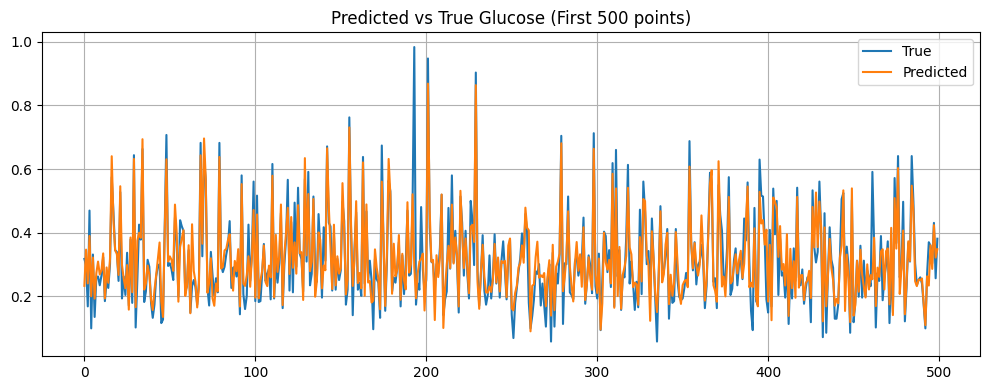

✅ MSE: 0.0028, MAE: 0.0367, R2: 0.8520

🧪 Config 2/5
hidden=32, dropout=0.3, lr=0.001, batch=64, time_steps=6
📉 Epoch 1/30, Train Loss: 0.0089, Val Loss: 0.0050
📉 Epoch 2/30, Train Loss: 0.0050, Val Loss: 0.0041
📉 Epoch 3/30, Train Loss: 0.0042, Val Loss: 0.0037
📉 Epoch 4/30, Train Loss: 0.0038, Val Loss: 0.0033
📉 Epoch 5/30, Train Loss: 0.0036, Val Loss: 0.0032
📉 Epoch 6/30, Train Loss: 0.0035, Val Loss: 0.0031
📉 Epoch 7/30, Train Loss: 0.0034, Val Loss: 0.0030
📉 Epoch 8/30, Train Loss: 0.0033, Val Loss: 0.0030
📉 Epoch 9/30, Train Loss: 0.0033, Val Loss: 0.0030
📉 Epoch 10/30, Train Loss: 0.0032, Val Loss: 0.0034
📉 Epoch 11/30, Train Loss: 0.0032, Val Loss: 0.0029
📉 Epoch 12/30, Train Loss: 0.0031, Val Loss: 0.0032
📉 Epoch 13/30, Train Loss: 0.0031, Val Loss: 0.0030
📉 Epoch 14/30, Train Loss: 0.0031, Val Loss: 0.0029
📉 Epoch 15/30, Train Loss: 0.0030, Val Loss: 0.0029
📉 Epoch 16/30, Train Loss: 0.0031, Val Loss: 0.0028
🛑 Early stopping triggered.
📉 Test MSE:  0.0028
📏 Test MAE:  0.0367

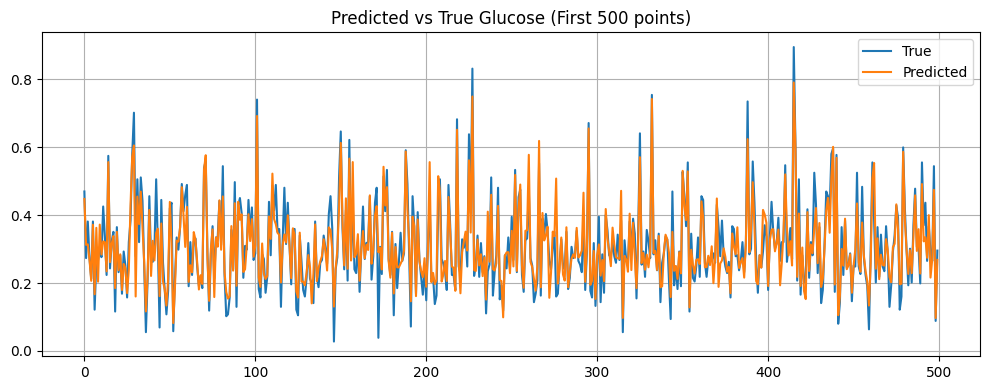

✅ MSE: 0.0028, MAE: 0.0367, R2: 0.8458

🧪 Config 3/5
hidden=32, dropout=0.2, lr=0.001, batch=64, time_steps=12
📉 Epoch 1/30, Train Loss: 0.0072, Val Loss: 0.0045
📉 Epoch 2/30, Train Loss: 0.0045, Val Loss: 0.0035
📉 Epoch 3/30, Train Loss: 0.0039, Val Loss: 0.0031
📉 Epoch 4/30, Train Loss: 0.0036, Val Loss: 0.0030
📉 Epoch 5/30, Train Loss: 0.0035, Val Loss: 0.0030
📉 Epoch 6/30, Train Loss: 0.0034, Val Loss: 0.0029
📉 Epoch 7/30, Train Loss: 0.0034, Val Loss: 0.0029
📉 Epoch 8/30, Train Loss: 0.0032, Val Loss: 0.0028
📉 Epoch 9/30, Train Loss: 0.0032, Val Loss: 0.0027
📉 Epoch 10/30, Train Loss: 0.0031, Val Loss: 0.0027
📉 Epoch 11/30, Train Loss: 0.0031, Val Loss: 0.0028
📉 Epoch 12/30, Train Loss: 0.0031, Val Loss: 0.0027
📉 Epoch 13/30, Train Loss: 0.0031, Val Loss: 0.0028
📉 Epoch 14/30, Train Loss: 0.0030, Val Loss: 0.0027
🛑 Early stopping triggered.
📉 Test MSE:  0.0027
📏 Test MAE:  0.0358
📈 Test R2 Score: 0.8580


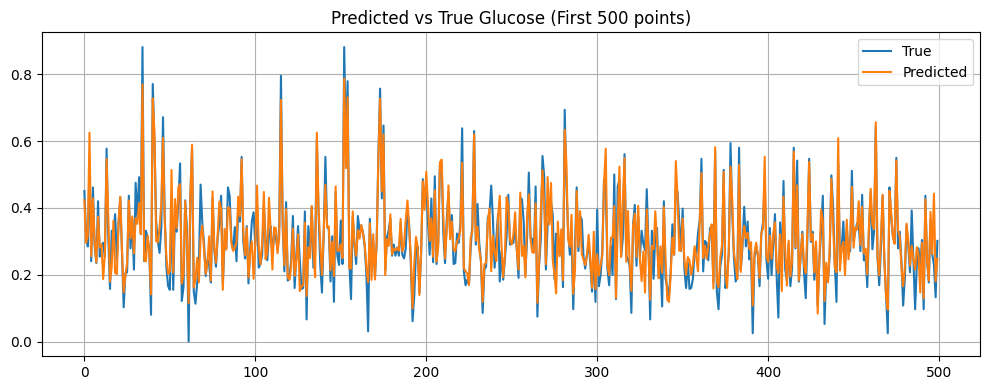

✅ MSE: 0.0027, MAE: 0.0358, R2: 0.8580

🧪 Config 4/5
hidden=128, dropout=0.3, lr=0.0005, batch=128, time_steps=6
📉 Epoch 1/30, Train Loss: 0.0104, Val Loss: 0.0054
📉 Epoch 2/30, Train Loss: 0.0053, Val Loss: 0.0049
📉 Epoch 3/30, Train Loss: 0.0047, Val Loss: 0.0041
📉 Epoch 4/30, Train Loss: 0.0042, Val Loss: 0.0037
📉 Epoch 5/30, Train Loss: 0.0039, Val Loss: 0.0037
📉 Epoch 6/30, Train Loss: 0.0037, Val Loss: 0.0034
📉 Epoch 7/30, Train Loss: 0.0036, Val Loss: 0.0033
📉 Epoch 8/30, Train Loss: 0.0035, Val Loss: 0.0033
📉 Epoch 9/30, Train Loss: 0.0034, Val Loss: 0.0033
📉 Epoch 10/30, Train Loss: 0.0034, Val Loss: 0.0033
📉 Epoch 11/30, Train Loss: 0.0033, Val Loss: 0.0032
📉 Epoch 12/30, Train Loss: 0.0032, Val Loss: 0.0031
📉 Epoch 13/30, Train Loss: 0.0032, Val Loss: 0.0031
📉 Epoch 14/30, Train Loss: 0.0031, Val Loss: 0.0031
📉 Epoch 15/30, Train Loss: 0.0031, Val Loss: 0.0031
📉 Epoch 16/30, Train Loss: 0.0031, Val Loss: 0.0032
📉 Epoch 17/30, Train Loss: 0.0030, Val Loss: 0.0030
📉 Epoch 18/3

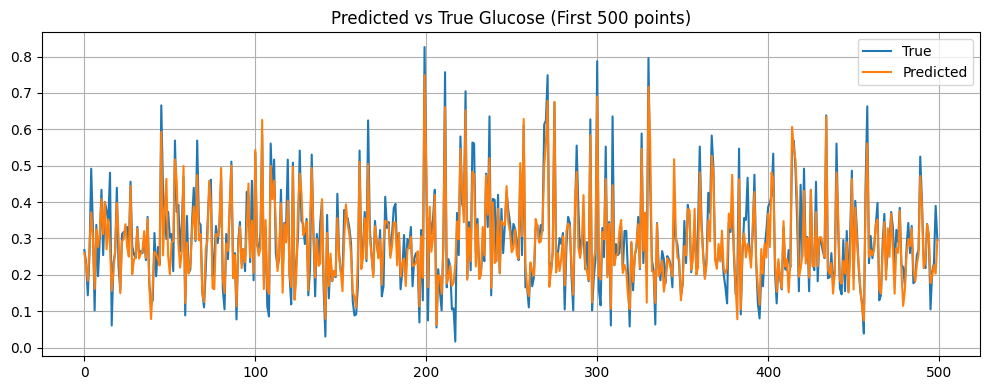

✅ MSE: 0.0029, MAE: 0.0370, R2: 0.8457

🧪 Config 5/5
hidden=32, dropout=0.4, lr=0.0005, batch=128, time_steps=12
📉 Epoch 1/30, Train Loss: 0.0126, Val Loss: 0.0057
📉 Epoch 2/30, Train Loss: 0.0061, Val Loss: 0.0052
📉 Epoch 3/30, Train Loss: 0.0056, Val Loss: 0.0050
📉 Epoch 4/30, Train Loss: 0.0053, Val Loss: 0.0047
📉 Epoch 5/30, Train Loss: 0.0050, Val Loss: 0.0044
📉 Epoch 6/30, Train Loss: 0.0047, Val Loss: 0.0040
📉 Epoch 7/30, Train Loss: 0.0043, Val Loss: 0.0037
📉 Epoch 8/30, Train Loss: 0.0042, Val Loss: 0.0036
📉 Epoch 9/30, Train Loss: 0.0040, Val Loss: 0.0034
📉 Epoch 10/30, Train Loss: 0.0039, Val Loss: 0.0033
📉 Epoch 11/30, Train Loss: 0.0037, Val Loss: 0.0033
📉 Epoch 12/30, Train Loss: 0.0037, Val Loss: 0.0032
📉 Epoch 13/30, Train Loss: 0.0036, Val Loss: 0.0032
📉 Epoch 14/30, Train Loss: 0.0036, Val Loss: 0.0031
📉 Epoch 15/30, Train Loss: 0.0035, Val Loss: 0.0032
📉 Epoch 16/30, Train Loss: 0.0035, Val Loss: 0.0031
📉 Epoch 17/30, Train Loss: 0.0034, Val Loss: 0.0031
📉 Epoch 18/3

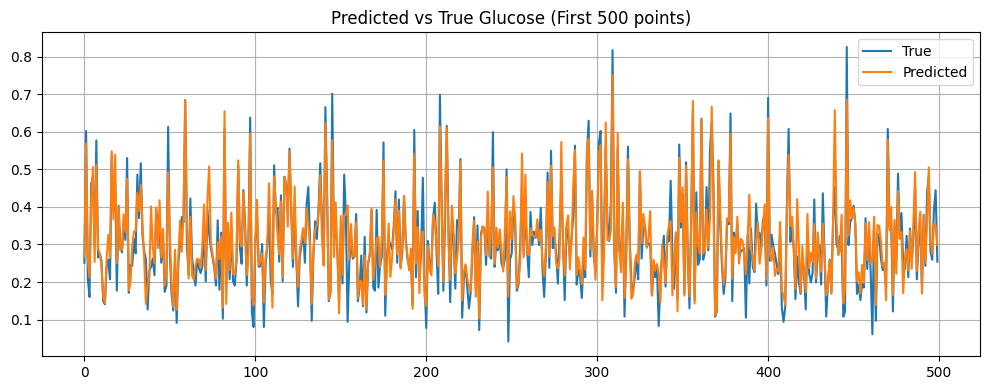

✅ MSE: 0.0030, MAE: 0.0377, R2: 0.8373


In [37]:
# Example
configs = [
    (128, 0.2, 0.0005, 64, 12),
    (32, 0.3, 0.001, 64, 6),
    (32, 0.2, 0.001, 64, 12),
    (128, 0.3, 0.0005, 128, 6),
    (32, 0.4, 0.0005, 128, 12)
]

# Call the search
results = run_random_search(X, y, input_size=X.shape[2], configs=configs)

## use different randoms maybe we can improve our r2


🧪 Config 1/7
hidden=128, dropout=0.15, lr=0.0005, batch=64, time_steps=12
📉 Epoch 1/50, Train Loss: 0.0075, Val Loss: 0.0048
📉 Epoch 2/50, Train Loss: 0.0045, Val Loss: 0.0047
📉 Epoch 3/50, Train Loss: 0.0039, Val Loss: 0.0036
📉 Epoch 4/50, Train Loss: 0.0036, Val Loss: 0.0032
📉 Epoch 5/50, Train Loss: 0.0035, Val Loss: 0.0031
📉 Epoch 6/50, Train Loss: 0.0034, Val Loss: 0.0034
📉 Epoch 7/50, Train Loss: 0.0033, Val Loss: 0.0030
📉 Epoch 8/50, Train Loss: 0.0032, Val Loss: 0.0031
📉 Epoch 9/50, Train Loss: 0.0032, Val Loss: 0.0029
📉 Epoch 10/50, Train Loss: 0.0031, Val Loss: 0.0031
📉 Epoch 11/50, Train Loss: 0.0031, Val Loss: 0.0029
📉 Epoch 12/50, Train Loss: 0.0030, Val Loss: 0.0029
📉 Epoch 13/50, Train Loss: 0.0030, Val Loss: 0.0028
📉 Epoch 14/50, Train Loss: 0.0030, Val Loss: 0.0028
📉 Epoch 15/50, Train Loss: 0.0029, Val Loss: 0.0028
📉 Epoch 16/50, Train Loss: 0.0029, Val Loss: 0.0033
📉 Epoch 17/50, Train Loss: 0.0029, Val Loss: 0.0028
📉 Epoch 18/50, Train Loss: 0.0029, Val Loss: 0.002

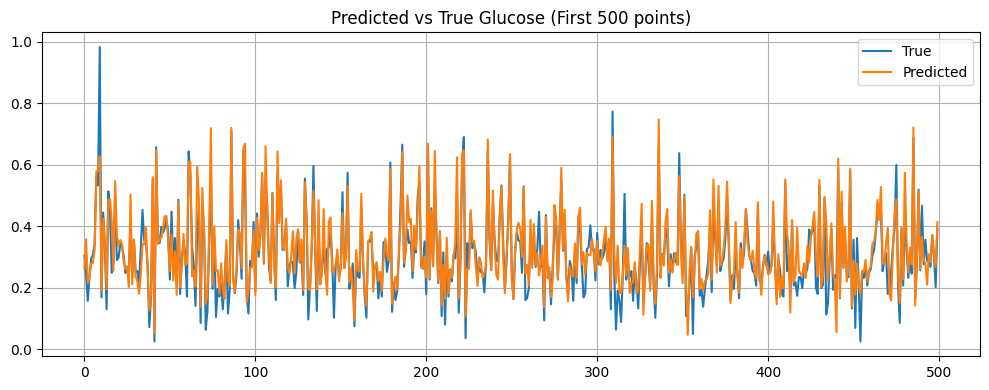

📉 Test MSE:  0.0030
📏 Test MAE:  0.0385
📈 Test R2:   0.8327

🧪 Config 2/7
hidden=128, dropout=0.25, lr=0.0003, batch=64, time_steps=12
📉 Epoch 1/50, Train Loss: 0.0094, Val Loss: 0.0053
📉 Epoch 2/50, Train Loss: 0.0052, Val Loss: 0.0047
📉 Epoch 3/50, Train Loss: 0.0046, Val Loss: 0.0042
📉 Epoch 4/50, Train Loss: 0.0041, Val Loss: 0.0036
📉 Epoch 5/50, Train Loss: 0.0038, Val Loss: 0.0035
📉 Epoch 6/50, Train Loss: 0.0037, Val Loss: 0.0034
📉 Epoch 7/50, Train Loss: 0.0035, Val Loss: 0.0034
📉 Epoch 8/50, Train Loss: 0.0034, Val Loss: 0.0032
📉 Epoch 9/50, Train Loss: 0.0034, Val Loss: 0.0032
📉 Epoch 10/50, Train Loss: 0.0033, Val Loss: 0.0031
📉 Epoch 11/50, Train Loss: 0.0033, Val Loss: 0.0031
📉 Epoch 12/50, Train Loss: 0.0032, Val Loss: 0.0031
📉 Epoch 13/50, Train Loss: 0.0032, Val Loss: 0.0030
📉 Epoch 14/50, Train Loss: 0.0031, Val Loss: 0.0030
📉 Epoch 15/50, Train Loss: 0.0031, Val Loss: 0.0030
📉 Epoch 16/50, Train Loss: 0.0031, Val Loss: 0.0031
📉 Epoch 17/50, Train Loss: 0.0030, Val Los

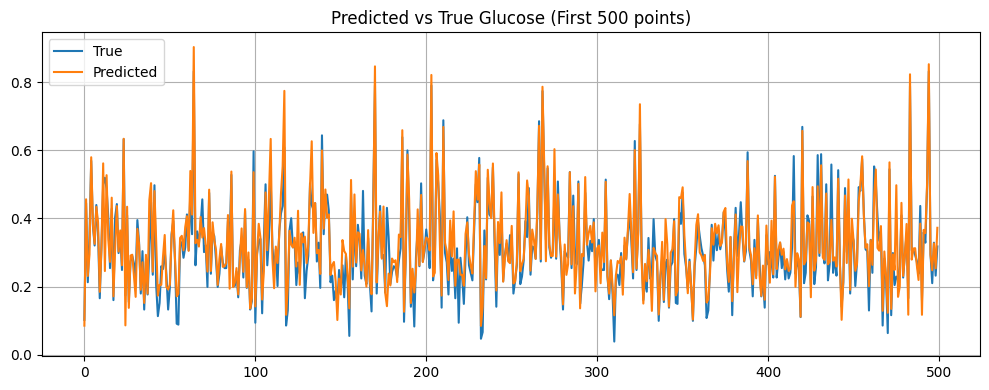

📉 Test MSE:  0.0030
📏 Test MAE:  0.0376
📈 Test R2:   0.8424

🧪 Config 3/7
hidden=256, dropout=0.2, lr=0.0005, batch=64, time_steps=12
📉 Epoch 1/50, Train Loss: 0.0078, Val Loss: 0.0045
📉 Epoch 2/50, Train Loss: 0.0044, Val Loss: 0.0034
📉 Epoch 3/50, Train Loss: 0.0038, Val Loss: 0.0032
📉 Epoch 4/50, Train Loss: 0.0036, Val Loss: 0.0030
📉 Epoch 5/50, Train Loss: 0.0035, Val Loss: 0.0031
📉 Epoch 6/50, Train Loss: 0.0034, Val Loss: 0.0030
📉 Epoch 7/50, Train Loss: 0.0033, Val Loss: 0.0030
📉 Epoch 8/50, Train Loss: 0.0032, Val Loss: 0.0028
📉 Epoch 9/50, Train Loss: 0.0032, Val Loss: 0.0030
📉 Epoch 10/50, Train Loss: 0.0032, Val Loss: 0.0029
📉 Epoch 11/50, Train Loss: 0.0031, Val Loss: 0.0029
📉 Epoch 12/50, Train Loss: 0.0030, Val Loss: 0.0030
📉 Epoch 13/50, Train Loss: 0.0030, Val Loss: 0.0028
🛑 Early stopping triggered.
📉 Test MSE:  0.0027
📏 Test MAE:  0.0364
📈 Test R2 Score: 0.8499


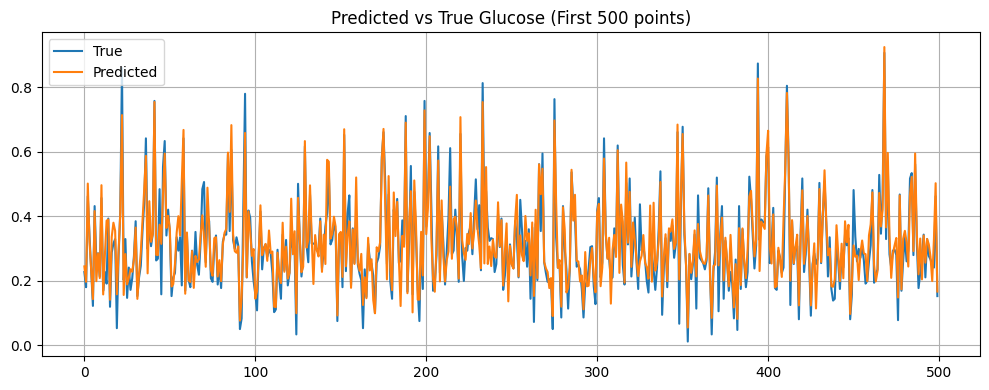

📉 Test MSE:  0.0027
📏 Test MAE:  0.0364
📈 Test R2:   0.8499

🧪 Config 4/7
hidden=521, dropout=0.2, lr=0.0005, batch=64, time_steps=12
📉 Epoch 1/50, Train Loss: 0.0068, Val Loss: 0.0039
📉 Epoch 2/50, Train Loss: 0.0040, Val Loss: 0.0036
📉 Epoch 3/50, Train Loss: 0.0036, Val Loss: 0.0032
📉 Epoch 4/50, Train Loss: 0.0034, Val Loss: 0.0033
📉 Epoch 5/50, Train Loss: 0.0034, Val Loss: 0.0041
📉 Epoch 6/50, Train Loss: 0.0033, Val Loss: 0.0031
📉 Epoch 7/50, Train Loss: 0.0032, Val Loss: 0.0032
📉 Epoch 8/50, Train Loss: 0.0032, Val Loss: 0.0030
📉 Epoch 9/50, Train Loss: 0.0031, Val Loss: 0.0030
📉 Epoch 10/50, Train Loss: 0.0031, Val Loss: 0.0030
📉 Epoch 11/50, Train Loss: 0.0030, Val Loss: 0.0028
📉 Epoch 12/50, Train Loss: 0.0030, Val Loss: 0.0029
📉 Epoch 13/50, Train Loss: 0.0030, Val Loss: 0.0028
📉 Epoch 14/50, Train Loss: 0.0029, Val Loss: 0.0028
📉 Epoch 15/50, Train Loss: 0.0029, Val Loss: 0.0028
📉 Epoch 16/50, Train Loss: 0.0029, Val Loss: 0.0028
🛑 Early stopping triggered.
📉 Test MSE:  0.

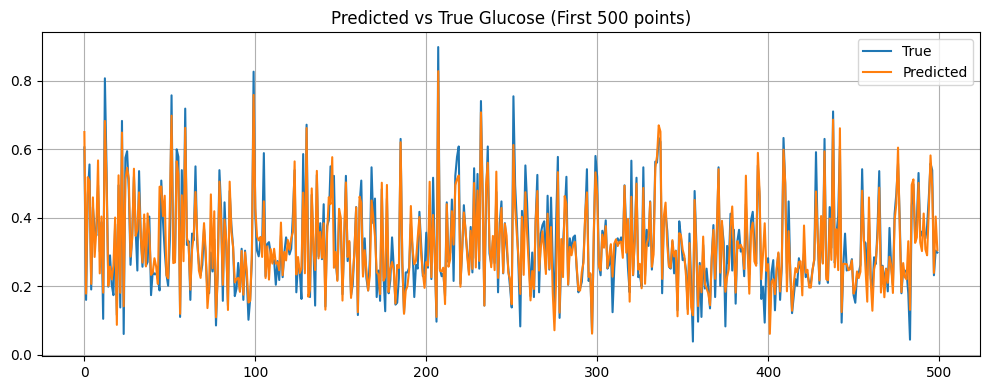

📉 Test MSE:  0.0028
📏 Test MAE:  0.0358
📈 Test R2:   0.8493

🧪 Config 5/7
hidden=356, dropout=0.2, lr=0.0005, batch=64, time_steps=12
📉 Epoch 1/50, Train Loss: 0.0067, Val Loss: 0.0041
📉 Epoch 2/50, Train Loss: 0.0042, Val Loss: 0.0033
📉 Epoch 3/50, Train Loss: 0.0037, Val Loss: 0.0032
📉 Epoch 4/50, Train Loss: 0.0035, Val Loss: 0.0031
📉 Epoch 5/50, Train Loss: 0.0034, Val Loss: 0.0030
📉 Epoch 6/50, Train Loss: 0.0034, Val Loss: 0.0030
📉 Epoch 7/50, Train Loss: 0.0033, Val Loss: 0.0029
📉 Epoch 8/50, Train Loss: 0.0032, Val Loss: 0.0028
📉 Epoch 9/50, Train Loss: 0.0032, Val Loss: 0.0028
📉 Epoch 10/50, Train Loss: 0.0031, Val Loss: 0.0028
📉 Epoch 11/50, Train Loss: 0.0031, Val Loss: 0.0028
📉 Epoch 12/50, Train Loss: 0.0030, Val Loss: 0.0027
📉 Epoch 13/50, Train Loss: 0.0030, Val Loss: 0.0028
📉 Epoch 14/50, Train Loss: 0.0030, Val Loss: 0.0026
📉 Epoch 15/50, Train Loss: 0.0029, Val Loss: 0.0026
📉 Epoch 16/50, Train Loss: 0.0029, Val Loss: 0.0027
📉 Epoch 17/50, Train Loss: 0.0029, Val Loss

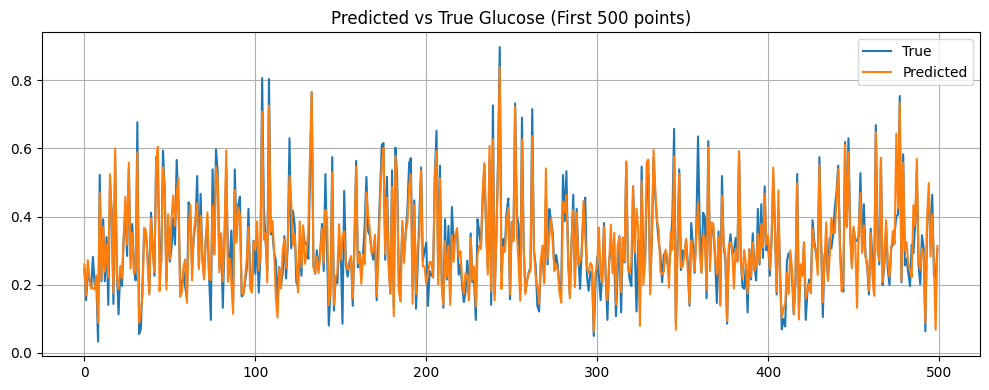

📉 Test MSE:  0.0026
📏 Test MAE:  0.0348
📈 Test R2:   0.8608

🧪 Config 6/7
hidden=128, dropout=0.2, lr=0.0005, batch=32, time_steps=12
📉 Epoch 1/50, Train Loss: 0.0067, Val Loss: 0.0041
📉 Epoch 2/50, Train Loss: 0.0042, Val Loss: 0.0034
📉 Epoch 3/50, Train Loss: 0.0037, Val Loss: 0.0033
📉 Epoch 4/50, Train Loss: 0.0035, Val Loss: 0.0032
📉 Epoch 5/50, Train Loss: 0.0034, Val Loss: 0.0031
📉 Epoch 6/50, Train Loss: 0.0033, Val Loss: 0.0031
📉 Epoch 7/50, Train Loss: 0.0032, Val Loss: 0.0030
📉 Epoch 8/50, Train Loss: 0.0032, Val Loss: 0.0031
📉 Epoch 9/50, Train Loss: 0.0031, Val Loss: 0.0029
📉 Epoch 10/50, Train Loss: 0.0030, Val Loss: 0.0028
📉 Epoch 11/50, Train Loss: 0.0030, Val Loss: 0.0028
📉 Epoch 12/50, Train Loss: 0.0030, Val Loss: 0.0029
📉 Epoch 13/50, Train Loss: 0.0029, Val Loss: 0.0028
📉 Epoch 14/50, Train Loss: 0.0029, Val Loss: 0.0029
📉 Epoch 15/50, Train Loss: 0.0029, Val Loss: 0.0027
🛑 Early stopping triggered.
📉 Test MSE:  0.0027
📏 Test MAE:  0.0355
📈 Test R2 Score: 0.8552


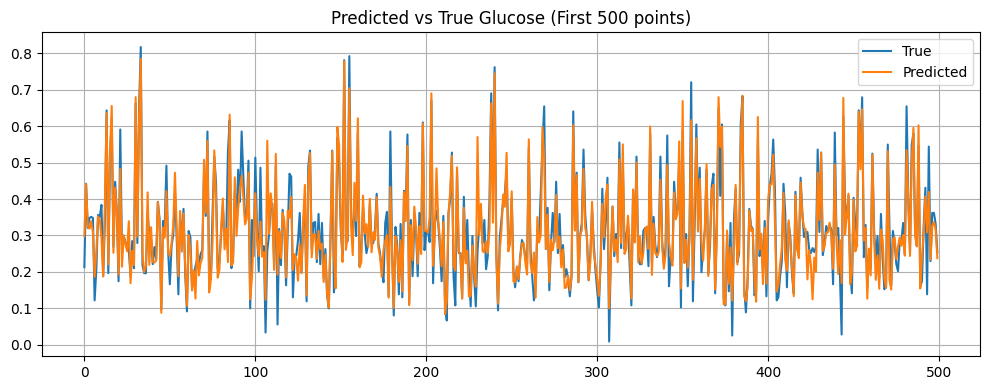

📉 Test MSE:  0.0027
📏 Test MAE:  0.0355
📈 Test R2:   0.8552

🧪 Config 7/7
hidden=128, dropout=0.2, lr=0.0007, batch=64, time_steps=12
📉 Epoch 1/50, Train Loss: 0.0072, Val Loss: 0.0047
📉 Epoch 2/50, Train Loss: 0.0043, Val Loss: 0.0036
📉 Epoch 3/50, Train Loss: 0.0037, Val Loss: 0.0034
📉 Epoch 4/50, Train Loss: 0.0035, Val Loss: 0.0033
📉 Epoch 5/50, Train Loss: 0.0034, Val Loss: 0.0032
📉 Epoch 6/50, Train Loss: 0.0033, Val Loss: 0.0031
📉 Epoch 7/50, Train Loss: 0.0032, Val Loss: 0.0032
📉 Epoch 8/50, Train Loss: 0.0032, Val Loss: 0.0031
📉 Epoch 9/50, Train Loss: 0.0031, Val Loss: 0.0030
📉 Epoch 10/50, Train Loss: 0.0031, Val Loss: 0.0029
📉 Epoch 11/50, Train Loss: 0.0030, Val Loss: 0.0030
📉 Epoch 12/50, Train Loss: 0.0030, Val Loss: 0.0029
📉 Epoch 13/50, Train Loss: 0.0029, Val Loss: 0.0029
📉 Epoch 14/50, Train Loss: 0.0029, Val Loss: 0.0028
📉 Epoch 15/50, Train Loss: 0.0029, Val Loss: 0.0028
📉 Epoch 16/50, Train Loss: 0.0028, Val Loss: 0.0027
📉 Epoch 17/50, Train Loss: 0.0028, Val Loss

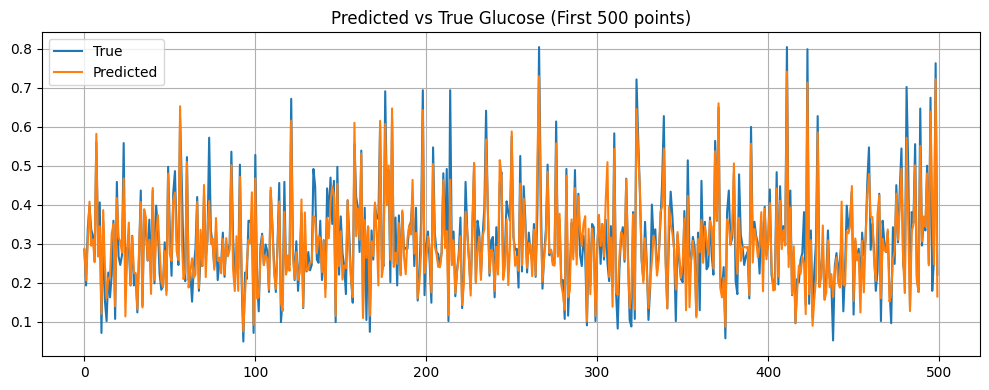

📉 Test MSE:  0.0028
📏 Test MAE:  0.0362
📈 Test R2:   0.8494

🏆 Sorted results by R²:
{'config': (356, 0.2, 0.0005, 64, 12), 'mse': 0.002574613783508539, 'mae': 0.034804198890924454, 'r2': 0.8607521057128906}
{'config': (128, 0.2, 0.0005, 32, 12), 'mse': 0.0027188993990421295, 'mae': 0.035457201302051544, 'r2': 0.8551911115646362}
{'config': (256, 0.2, 0.0005, 64, 12), 'mse': 0.002745801117271185, 'mae': 0.03636656701564789, 'r2': 0.8498610258102417}
{'config': (128, 0.2, 0.0007, 64, 12), 'mse': 0.002755755092948675, 'mae': 0.03622737154364586, 'r2': 0.8494060039520264}
{'config': (521, 0.2, 0.0005, 64, 12), 'mse': 0.0027878524269908667, 'mae': 0.03578351438045502, 'r2': 0.8492518663406372}
{'config': (128, 0.25, 0.0003, 64, 12), 'mse': 0.0029857421759516, 'mae': 0.03759698197245598, 'r2': 0.8424490094184875}
{'config': (128, 0.15, 0.0005, 64, 12), 'mse': 0.0030481477733701468, 'mae': 0.03847728669643402, 'r2': 0.8326892852783203}


In [38]:
# New configs based on your current best
new_configs = [
    (128, 0.15, 0.0005, 64, 12),  # A: Slightly less dropout
    (128, 0.25, 0.0003, 64, 12),  # B: More dropout + smaller LR
    (256, 0.2, 0.0005, 64, 12),
    (521, 0.2, 0.0005, 64, 12),
    (356, 0.2, 0.0005, 64, 12),# C: Larger hidden size
    (128, 0.2, 0.0005, 32, 12),   # D: Smaller batch size
    (128, 0.2, 0.0007, 64, 12),   # E: Slightly bigger LR
]

new_configs_1= [
    (128, 0.18, 0.0006, 64, 12),  # ⭐ best bet
    (128, 0.10, 0.0004, 64, 12),
    (192, 0.18, 0.0005, 64, 12),
    (128, 0.18, 0.0006, 48, 12),
    (128, 0.18, 0.0005, 64, 16),
]
new_configs_2 = [
    (128, 0.22, 0.00045, 32, 12),
    (128, 0.18, 0.00045, 32, 12),
    (128, 0.20, 0.0004, 32, 12),
    (128, 0.23, 0.0005, 32, 12),
    (128, 0.20, 0.00035, 32, 12),
]


def run_random_search(X_seq, y_seq, input_size, configs):
    results = []
    for i, (hidden_size, dropout, lr, batch_size, time_steps) in enumerate(configs):
        print(f"\n🧪 Config {i+1}/{len(configs)}")
        print(f"hidden={hidden_size}, dropout={dropout}, lr={lr}, batch={batch_size}, time_steps={time_steps}")

        # Convert to PyTorch tensors
        X_tensor = torch.from_numpy(X_seq).float()
        y_tensor = torch.from_numpy(y_seq).float()
        dataset = TensorDataset(X_tensor, y_tensor)

        # Train/Val split
        train_size = int(0.8 * len(dataset))
        val_size = len(dataset) - train_size
        train_ds, val_ds = torch.utils.data.random_split(dataset, [train_size, val_size])
        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

        # Model
        model = GlucoseLSTM(input_size=input_size, hidden_size=hidden_size, dropout=dropout)

        # Train
        model, _ = train_lstm_model(model, train_loader, val_loader, epochs=50, lr=lr)

        # Evaluate
        mse, mae, r2 = evaluate_model(model, val_loader)
        print(f"📉 Test MSE:  {mse:.4f}")
        print(f"📏 Test MAE:  {mae:.4f}")
        print(f"📈 Test R2:   {r2:.4f}")

        results.append({
            'config': (hidden_size, dropout, lr, batch_size, time_steps),
            'mse': mse,
            'mae': mae,
            'r2': r2
        })

    return results

# Run the search
results_new = run_random_search(X, y, input_size=X.shape[2], configs=new_configs)

# Sort by best R²
results_new = sorted(results_new, key=lambda x: x['r2'], reverse=True)

print("\n🏆 Sorted results by R²:")
for r in results_new:
    print(r)

In [39]:
import joblib
import torch

# 🔍 Step 1: Find best result based on R2 or lowest MSE
def select_best_model(results, metric='r2'):
    sorted_results = sorted(results, key=lambda x: -x[metric] if metric == 'r2' else x[metric])
    best = sorted_results[0]
    print(f"\n🏆 Best Config: {best['config']}")
    print(f"📉 MSE: {best['mse']:.4f}, MAE: {best['mae']:.4f}, R2: {best['r2']:.4f}")
    return best

# 🧠 Step 2: Retrain the best model on full data
def retrain_best_model(X_seq, y_seq, input_size, config, epochs=30):
    hidden_size, dropout, lr, batch_size, time_steps = config

    dataset = TensorDataset(torch.from_numpy(X_seq).float(), torch.from_numpy(y_seq).float())
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    model = GlucoseLSTM(input_size=input_size, hidden_size=hidden_size, dropout=dropout)
    model, history = train_lstm_model(model, loader, val_loader=None, epochs=epochs, lr=lr)
    return model

# 💾 Step 3: Save trained model
def save_model(model, path="glucose_lstm_best_model.pt"):
    torch.save(model.state_dict(), path)
    print(f"✅ Model saved to {path}")

In [40]:
# Step 1: Pick best model from results
best_result = select_best_model(results_new, metric='r2')

# Step 2: Retrain it fully
best_model = retrain_best_model(X, y, input_size=X.shape[2], config=best_result['config'], epochs=30)

# Step 3: Save the model
save_model(best_model, path="glucose_lstm_best_model.pt")


🏆 Best Config: (356, 0.2, 0.0005, 64, 12)
📉 MSE: 0.0026, MAE: 0.0348, R2: 0.8608
📉 Epoch 1/30, Train Loss: 0.0062
📉 Epoch 2/30, Train Loss: 0.0038
📉 Epoch 3/30, Train Loss: 0.0036
📉 Epoch 4/30, Train Loss: 0.0034
📉 Epoch 5/30, Train Loss: 0.0033
📉 Epoch 6/30, Train Loss: 0.0032
📉 Epoch 7/30, Train Loss: 0.0032
📉 Epoch 8/30, Train Loss: 0.0031
📉 Epoch 9/30, Train Loss: 0.0030
📉 Epoch 10/30, Train Loss: 0.0030
📉 Epoch 11/30, Train Loss: 0.0029
📉 Epoch 12/30, Train Loss: 0.0029
📉 Epoch 13/30, Train Loss: 0.0029
📉 Epoch 14/30, Train Loss: 0.0028
📉 Epoch 15/30, Train Loss: 0.0028
📉 Epoch 16/30, Train Loss: 0.0028
📉 Epoch 17/30, Train Loss: 0.0028
📉 Epoch 18/30, Train Loss: 0.0027
📉 Epoch 19/30, Train Loss: 0.0027
📉 Epoch 20/30, Train Loss: 0.0027
📉 Epoch 21/30, Train Loss: 0.0027
📉 Epoch 22/30, Train Loss: 0.0026
📉 Epoch 23/30, Train Loss: 0.0026
📉 Epoch 24/30, Train Loss: 0.0026
📉 Epoch 25/30, Train Loss: 0.0025
📉 Epoch 26/30, Train Loss: 0.0025
📉 Epoch 27/30, Train Loss: 0.0025
📉 Epoch 2

##fine turning




#splitiing data on dates
#sort dates
df_features['date'] = pd.to_datetime(df_features['date'])
df_features = df_features.sort_values('date').reset_index(drop=True)

#split
T0 = df_features['date'].min()
H_end = T0 + pd.Timedelta(days=90)
G_end = T0 + pd.Timedelta(days=120)

first_3_months = df_features[df_features['date'] < H_end]
gap = df_features[
    (df_features['date'] >= H_end) &
    (df_features['date'] < G_end)
]
recent_week = df_features[df_features['date'] >= G_end]


print("H:", first_3_months.date.min(), first_3_months.date.max())
print("G:", gap.date.min(), gap.date.max())
print("R:", recent_week.date.min(), recent_week.date.max())

In [41]:

# =========================
# 2. TRANSFER UTILITIES
# =========================
def load_pretrained(model, path):
    model.load_state_dict(torch.load(path))
    return model


def freeze_all(model):
    for p in model.parameters():
        p.requires_grad = False


def reset_head(model):
    model.fc = nn.Linear(
        model.fc.in_features,
        model.fc.out_features
    ).to(next(model.parameters()))

def unfreeze_last_lstm(model):
    # Unfreeze last LSTM layer (num_layers=2 → l1)
    for name, param in model.lstm.named_parameters():
        if "_l1" in name:
            param.requires_grad = True

    # Unfreeze fc
    for param in model.fc.parameters():
        param.requires_grad = True

    return model



# =========================
# 3. OPTIMIZERS
# =========================
def optimizer_head_only(model):
    return torch.optim.Adam(
        model.fc.parameters(),
        lr=1e-4,
        weight_decay=1e-5
    )


def optimizer_last_lstm(model):
    return torch.optim.Adam([
        {
            "params": [
                p for n, p in model.named_parameters()
                if "lstm" in n and "l1" in n
            ],
            "lr": 1e-4
        },
        {
            "params": model.fc.parameters(),
            "lr": 1e-3
        }
    ], weight_decay=1e-5)



# alter the weight_decay and lr for all frozen and see what will happen also alter the epoch use stocahiotc gradient 

In [42]:
# =========================
# 4. TRAIN / FINE-TUNE LOOP
# =========================
import copy
import torch.nn as nn

def train_model(
    model,
    loader,
    optimizer,
    epochs,
    patience=5,
    min_delta=1e-4
):
    criterion = nn.MSELoss()

    best_loss = float("inf")
    best_state = None
    epochs_no_improve = 0

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        for Xb, yb in loader:
            optimizer.zero_grad()

            preds = model(Xb)
            loss = criterion(preds, yb)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(loader)
        print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.6f}")

        # ---- early stopping logic ----
        if best_loss - avg_loss > min_delta:
            best_loss = avg_loss
            best_state = copy.deepcopy(model.state_dict())
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # restore best model
    if best_state is not None:
        model.load_state_dict(best_state)

    # return final score for random search
    return best_loss



    

In [43]:
# getting the best configs

# Sort by best R² (already done)
results_new = sorted(results_new, key=lambda x: x['r2'], reverse=True)

# Get best result
best_result = results_new[0]
best_config = best_result['config']

# Unpack config
hidden_size, dropout, lr, batch_size, seq_length = best_config

print("🏆 Best Config:", best_config)

# Build transfer model automatically
transfer_model = GlucoseLSTM(
    input_size=X.shape[2],
    hidden_size=hidden_size,
    num_layers=2,      # keep same as base
    dropout=dropout
)


🏆 Best Config: (356, 0.2, 0.0005, 64, 12)


In [44]:
#-- transfer of knowledge from base model
tranfer_model = load_pretrained(transfer_model, 'glucose_lstm_best_model.pt')

/tmp/ipykernel_40153/2353575521.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


In [45]:
# recent_weeks dataloader
train_dl_rw, test_dl_rw = prepare_lstm_dataloaders(X1, y1, batch_size= 64)
  


In [46]:
# -- freezing of all layers & reset head
freeze_all(transfer_model)
reset_head(transfer_model)

all_frozen_opt = optimizer_head_only(transfer_model)
train_model(transfer_model, train_dl_rw, all_frozen_opt, epochs=100)


Epoch 1/100 | Loss: 0.158311
Epoch 2/100 | Loss: 0.153919


/home/bioinforuser06/anaconda3/envs/machine_learning/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 3/100 | Loss: 0.149146
Epoch 4/100 | Loss: 0.144946
Epoch 5/100 | Loss: 0.140088
Epoch 6/100 | Loss: 0.135718
Epoch 7/100 | Loss: 0.131354
Epoch 8/100 | Loss: 0.127391
Epoch 9/100 | Loss: 0.123624
Epoch 10/100 | Loss: 0.119335
Epoch 11/100 | Loss: 0.115338
Epoch 12/100 | Loss: 0.111830
Epoch 13/100 | Loss: 0.108173
Epoch 14/100 | Loss: 0.104161
Epoch 15/100 | Loss: 0.100674
Epoch 16/100 | Loss: 0.097511
Epoch 17/100 | Loss: 0.094216
Epoch 18/100 | Loss: 0.090833
Epoch 19/100 | Loss: 0.088321
Epoch 20/100 | Loss: 0.084716
Epoch 21/100 | Loss: 0.082135
Epoch 22/100 | Loss: 0.079222
Epoch 23/100 | Loss: 0.076927
Epoch 24/100 | Loss: 0.074092
Epoch 25/100 | Loss: 0.071355
Epoch 26/100 | Loss: 0.069106
Epoch 27/100 | Loss: 0.067394
Epoch 28/100 | Loss: 0.064105
Epoch 29/100 | Loss: 0.062147
Epoch 30/100 | Loss: 0.060291
Epoch 31/100 | Loss: 0.058361
Epoch 32/100 | Loss: 0.055780
Epoch 33/100 | Loss: 0.053960
Epoch 34/100 | Loss: 0.052079
Epoch 35/100 | Loss: 0.050620
Epoch 36/100 | Lo

0.009158915543759411

# random search



In [47]:
import random
import math
import copy

In [48]:
def sample_log_uniform(low, high):
    return 10 ** random.uniform(math.log10(low), math.log10(high))


In [49]:
def optimizer_head_only(model, lr, weight_decay):
    return torch.optim.Adam(
        model.fc.parameters(),
        lr=lr,
        weight_decay=weight_decay
    )


In [50]:
def random_search_head_only(
    base_model,
    train_dl,
    n_trials=20,
    epochs=50
):
    best_score = -float("inf")
    best_config = None
    best_model_state = None

    for trial in range(n_trials):
        print(f"\n🔍 Trial {trial+1}/{n_trials}")

        # Sample hyperparameters
        lr = sample_log_uniform(*LR_RANGE)
        weight_decay = sample_log_uniform(*WD_RANGE)

        print(f"lr={lr:.2e}, weight_decay={weight_decay:.2e}")

        # Fresh copy of model
        model = copy.deepcopy(base_model)

        # Freeze + reset head
        freeze_all(model)
        reset_head(model)

        # Optimizer
        optimizer = optimizer_head_only(model, lr, weight_decay)

        # Train
        score = train_model(
            model,
            train_dl,
            optimizer,
            epochs=epochs
        )

        # Track best
        if score > best_score:
            best_score = score
            best_config = {"lr": lr, "weight_decay": weight_decay}
            best_model_state = copy.deepcopy(model.state_dict())

        print(f"Score: {score:.4f}")

    print("\n🏆 Best config:", best_config)
    print("Best score:", best_score)

    return best_config, best_model_state


In [51]:
def evaluate_model(model, data_loader, plot_len=500, verbose=True):
    
    model.eval()

    preds = []
    true = []

    with torch.no_grad():
        for xb, yb in data_loader:
            

            output = model(xb)
            if output.ndim > 1:
                output = output.squeeze(-1)

            preds.append(output.cpu().numpy())
            true.append(yb.cpu().numpy())

    # ✅ Use concatenate instead of vstack
    preds = np.concatenate(preds)
    true = np.concatenate(true)

    # Compute metrics
    mse = mean_squared_error(true, preds)
    mae = mean_absolute_error(true, preds)
    r2 = r2_score(true, preds)

    if verbose:
        print(f"📉 Test MSE:  {mse:.4f}")
        print(f"📏 Test MAE:  {mae:.4f}")
        print(f"📈 Test R2 Score: {r2:.4f}")

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(true[:plot_len], label="True")
    plt.plot(preds[:plot_len], label="Predicted")
    plt.legend()
    plt.title(f"Predicted vs True Glucose (First {plot_len} points)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return mse, mae, r2

📉 Test MSE:  0.0118
📏 Test MAE:  0.0815
📈 Test R2 Score: 0.4904


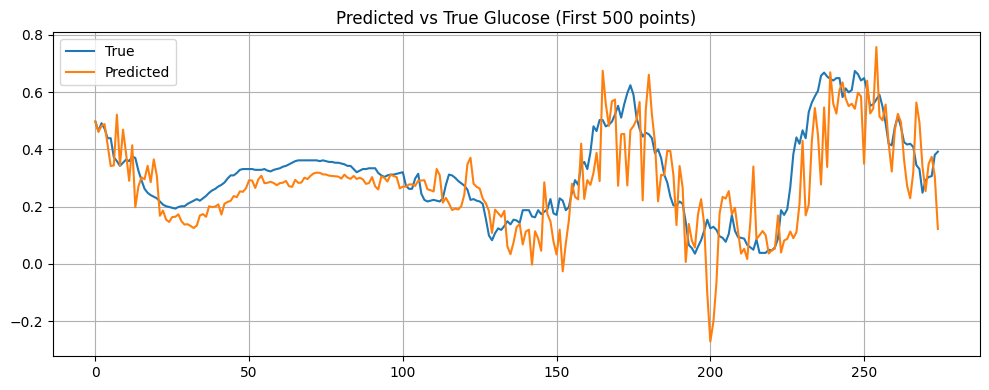

In [52]:
#evaluation of all frozen
mse, mae, r2= evaluate_model(transfer_model, test_dl_rw)

In [53]:
LR_RANGE = (1e-5, 5e-4)
WD_RANGE = (1e-6, 1e-3)


In [54]:
best_config, best_state = random_search_head_only(
    transfer_model,
    train_dl_rw,
    n_trials=30,
    epochs=200
)



🔍 Trial 1/30
lr=1.81e-04, weight_decay=4.33e-05
Epoch 1/200 | Loss: 0.171068
Epoch 2/200 | Loss: 0.162550
Epoch 3/200 | Loss: 0.153620


/home/bioinforuser06/anaconda3/envs/machine_learning/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 4/200 | Loss: 0.145803
Epoch 5/200 | Loss: 0.137571
Epoch 6/200 | Loss: 0.129631
Epoch 7/200 | Loss: 0.122541
Epoch 8/200 | Loss: 0.115398
Epoch 9/200 | Loss: 0.108815
Epoch 10/200 | Loss: 0.102437
Epoch 11/200 | Loss: 0.096409
Epoch 12/200 | Loss: 0.090550
Epoch 13/200 | Loss: 0.085113
Epoch 14/200 | Loss: 0.079554
Epoch 15/200 | Loss: 0.075311
Epoch 16/200 | Loss: 0.070125
Epoch 17/200 | Loss: 0.066126
Epoch 18/200 | Loss: 0.062482
Epoch 19/200 | Loss: 0.057988
Epoch 20/200 | Loss: 0.054122
Epoch 21/200 | Loss: 0.050833
Epoch 22/200 | Loss: 0.047668
Epoch 23/200 | Loss: 0.045023
Epoch 24/200 | Loss: 0.042143
Epoch 25/200 | Loss: 0.038832
Epoch 26/200 | Loss: 0.037318
Epoch 27/200 | Loss: 0.034898
Epoch 28/200 | Loss: 0.032486
Epoch 29/200 | Loss: 0.031028
Epoch 30/200 | Loss: 0.028866
Epoch 31/200 | Loss: 0.027016
Epoch 32/200 | Loss: 0.025721
Epoch 33/200 | Loss: 0.024351
Epoch 34/200 | Loss: 0.022574
Epoch 35/200 | Loss: 0.020741
Epoch 36/200 | Loss: 0.019661
Epoch 37/200 | L

In [57]:
tranfer_model_1 = load_pretrained(transfer_model, 'glucose_lstm_best_model.pt')

/tmp/ipykernel_40153/2353575521.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


In [60]:
#-- unfreezing last layer
freeze_all(tranfer_model_1)
unfreeze_last = unfreeze_last_lstm(tranfer_model_1)




In [61]:
unfreeze_opt = optimizer_last_lstm(unfreeze_last)
train_model(unfreeze_last, train_dl_rw, unfreeze_opt, epochs=200)

Epoch 1/200 | Loss: 0.006622
Epoch 2/200 | Loss: 0.006296
Epoch 3/200 | Loss: 0.006219
Epoch 4/200 | Loss: 0.006032
Epoch 5/200 | Loss: 0.005880
Epoch 6/200 | Loss: 0.005789
Epoch 7/200 | Loss: 0.005668
Epoch 8/200 | Loss: 0.005513
Epoch 9/200 | Loss: 0.005600
Epoch 10/200 | Loss: 0.005412
Epoch 11/200 | Loss: 0.005442
Epoch 12/200 | Loss: 0.005338
Epoch 13/200 | Loss: 0.005208
Epoch 14/200 | Loss: 0.005197
Epoch 15/200 | Loss: 0.005231
Epoch 16/200 | Loss: 0.005076
Epoch 17/200 | Loss: 0.004946
Epoch 18/200 | Loss: 0.004972
Epoch 19/200 | Loss: 0.004855
Epoch 20/200 | Loss: 0.004963
Epoch 21/200 | Loss: 0.004845
Epoch 22/200 | Loss: 0.004711
Epoch 23/200 | Loss: 0.004752
Epoch 24/200 | Loss: 0.004751
Epoch 25/200 | Loss: 0.004651
Epoch 26/200 | Loss: 0.004688
Epoch 27/200 | Loss: 0.004632
Early stopping at epoch 27


0.004710835555835563

In [62]:

# =========================
#  grid OPTIMIZERS
# =========================

def optimizer_last_lstm_grid(model, lr_lstm, lr_fc, weight_decay):
    return torch.optim.Adam([
        {
            "params": [
                p for n, p in model.named_parameters()
                if "lstm" in n and "_l1" in n
            ],
            "lr": lr_lstm
        },
        {
            "params": model.fc.parameters(),
            "lr": lr_fc
        }
    ], weight_decay=weight_decay)



In [63]:
#the grid 


lr_lstm_list = [1e-4, 5e-4, 1e-3]
lr_fc_list   = [1e-3, 5e-3]
wd_list      = [0, 1e-5, 1e-4]

best_loss = float("inf")
best_config = None

for lr_lstm in lr_lstm_list:
    for lr_fc in lr_fc_list:
        for wd in wd_list:

            print(f"\nTesting: lr_lstm={lr_lstm}, lr_fc={lr_fc}, wd={wd}")

            # 🔁 RESET MODEL EACH RUN
            model = load_pretrained(transfer_model, 'glucose_lstm_best_model.pt')

            freeze_all(model)
            model = unfreeze_last_lstm(model)

            optimizer = optimizer_last_lstm_grid(model, lr_lstm, lr_fc, wd)

            val_loss = train_model(
                model,
                train_dl_rw,
                optimizer,
                epochs=50  # smaller for search
            )

            if val_loss < best_loss:
                best_loss = val_loss
                best_config = (lr_lstm, lr_fc, wd)

print("\nBest config:", best_config)
print("Best val loss:", best_loss)



Testing: lr_lstm=0.0001, lr_fc=0.001, wd=0
Epoch 1/50 | Loss: 0.006706


/tmp/ipykernel_40153/2353575521.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


Epoch 2/50 | Loss: 0.006317
Epoch 3/50 | Loss: 0.006156
Epoch 4/50 | Loss: 0.005995
Epoch 5/50 | Loss: 0.005853
Epoch 6/50 | Loss: 0.005724
Epoch 7/50 | Loss: 0.005607
Epoch 8/50 | Loss: 0.005580
Epoch 9/50 | Loss: 0.005623
Epoch 10/50 | Loss: 0.005318
Epoch 11/50 | Loss: 0.005247
Epoch 12/50 | Loss: 0.005255
Epoch 13/50 | Loss: 0.005173
Epoch 14/50 | Loss: 0.005091
Epoch 15/50 | Loss: 0.005139
Epoch 16/50 | Loss: 0.005017
Epoch 17/50 | Loss: 0.004982
Epoch 18/50 | Loss: 0.004863
Epoch 19/50 | Loss: 0.004788
Epoch 20/50 | Loss: 0.004799
Epoch 21/50 | Loss: 0.004699
Epoch 22/50 | Loss: 0.004634
Epoch 23/50 | Loss: 0.004632
Epoch 24/50 | Loss: 0.004531
Epoch 25/50 | Loss: 0.004486
Epoch 26/50 | Loss: 0.004438
Epoch 27/50 | Loss: 0.004418
Epoch 28/50 | Loss: 0.004463
Epoch 29/50 | Loss: 0.004345
Epoch 30/50 | Loss: 0.004279
Epoch 31/50 | Loss: 0.004235
Epoch 32/50 | Loss: 0.004163
Epoch 33/50 | Loss: 0.004153
Epoch 34/50 | Loss: 0.004245
Epoch 35/50 | Loss: 0.004216
Epoch 36/50 | Loss: 0.

In [64]:
# Trying freezing different layers 
 # ------------------------
# Gradually Unfreeze Layers
# ------------------------
def unfreeze_lstm_layers(model, layers="all"):
    """
    layers: "all" -> all layers
            int -> unfreeze last n layers
    """
    num_layers = model.lstm.num_layers
    if layers == "all":
        target_layers = range(num_layers)
    elif isinstance(layers, int):
        target_layers = range(num_layers - layers, num_layers)
    else:
        raise ValueError("layers must be 'all' or int")

    for name, param in model.lstm.named_parameters():
        for l in target_layers:
            if f"_l{l}" in name:
                param.requires_grad = True

    # always unfreeze FC
    for param in model.fc.parameters():
        param.requires_grad = True

    return model


In [65]:
def get_optimizer(model, lr_lstm=1e-4, lr_fc=1e-3, weight_decay=1e-5):
    optimizer = torch.optim.Adam([
        {
            "params": [p for n, p in model.named_parameters() if "lstm" in n and p.requires_grad],
            "lr": lr_lstm
        },
        {
            "params": [p for n, p in model.named_parameters() if "fc" in n and p.requires_grad],
            "lr": lr_fc
        }
    ], weight_decay=weight_decay)
    return optimizer

def get_scheduler(optimizer, mode="min"):
    return torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode=mode, factor=0.5, patience=5, verbose=True
    )


In [66]:
# train model for grid
def train_model_grid(
    model,
    loader,
    optimizer,
    epochs=200,
    patience=10,
    min_delta=1e-4,
    device="cpu"
):
    model = model.to(device)
    criterion = nn.MSELoss()

    best_loss = float("inf")
    best_state = None
    epochs_no_improve = 0

    scheduler = get_scheduler(optimizer)

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        for Xb, yb in loader:
            Xb, yb = Xb.to(device), yb.to(device)

            optimizer.zero_grad()
            preds = model(Xb)
            loss = criterion(preds, yb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(loader)
        rmse = math.sqrt(avg_loss)
        print(f"Epoch {epoch+1}/{epochs} | MSE: {avg_loss:.6f} | RMSE: {rmse:.6f}")

        # Scheduler step
        scheduler.step(avg_loss)

        # Early stopping
        if best_loss - avg_loss > min_delta:
            best_loss = avg_loss
            best_state = copy.deepcopy(model.state_dict())
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Restore best model
    if best_state is not None:
        model.load_state_dict(best_state)

    # ✅ RETURN 3 VALUES
    return model, best_loss, rmse


In [67]:
lr_lstm_list = [1e-5, 5e-5, 1e-4]
lr_fc_list   = [1e-3, 5e-3]
wd_list      = [0.1, 1e-5]

best_rmse = float("inf")
best_config = None
best_model = None

for lr_lstm in lr_lstm_list:
    for lr_fc in lr_fc_list:
        for wd in wd_list:
            print(f"\nTesting: lr_lstm={lr_lstm}, lr_fc={lr_fc}, wd={wd}")

            # reset model each run
            model = load_pretrained(transfer_model, 'glucose_lstm_best_model.pt')
            freeze_all(model)
            model = unfreeze_lstm_layers(model, layers=1)  # gradually unfreeze last LSTM layer

            optimizer = get_optimizer(model, lr_lstm, lr_fc, wd)

            trained_model, val_loss, val_rmse = train_model_grid(
                model,
                train_dl_rw,
                optimizer,
                epochs=50  # smaller for hyperparameter search
            )

            if val_rmse < best_rmse:
                best_rmse = val_rmse
                best_config = (lr_lstm, lr_fc, wd)
                best_model = copy.deepcopy(trained_model)

print("\nBest config:", best_config)
print("Best RMSE:", best_rmse)



Testing: lr_lstm=1e-05, lr_fc=0.001, wd=0.1
Epoch 1/50 | MSE: 0.007631 | RMSE: 0.087357


/tmp/ipykernel_40153/2353575521.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))
/home/bioinforuser06/anaconda3/envs/machine_learn

Epoch 2/50 | MSE: 0.008362 | RMSE: 0.091444
Epoch 3/50 | MSE: 0.008239 | RMSE: 0.090767
Epoch 4/50 | MSE: 0.007581 | RMSE: 0.087070
Epoch 5/50 | MSE: 0.007320 | RMSE: 0.085559
Epoch 6/50 | MSE: 0.007379 | RMSE: 0.085900
Epoch 7/50 | MSE: 0.007395 | RMSE: 0.085994
Epoch 8/50 | MSE: 0.007378 | RMSE: 0.085896
Epoch 9/50 | MSE: 0.007073 | RMSE: 0.084103
Epoch 10/50 | MSE: 0.007100 | RMSE: 0.084260
Epoch 11/50 | MSE: 0.006964 | RMSE: 0.083453
Epoch 12/50 | MSE: 0.007079 | RMSE: 0.084137
Epoch 13/50 | MSE: 0.007171 | RMSE: 0.084681
Epoch 14/50 | MSE: 0.006886 | RMSE: 0.082984
Epoch 15/50 | MSE: 0.006894 | RMSE: 0.083029
Epoch 16/50 | MSE: 0.007081 | RMSE: 0.084149
Epoch 17/50 | MSE: 0.006832 | RMSE: 0.082655
Epoch 18/50 | MSE: 0.006852 | RMSE: 0.082776
Epoch 19/50 | MSE: 0.007169 | RMSE: 0.084672
Epoch 20/50 | MSE: 0.006980 | RMSE: 0.083549
Epoch 21/50 | MSE: 0.006798 | RMSE: 0.082450
Epoch 22/50 | MSE: 0.006985 | RMSE: 0.083576
Epoch 23/50 | MSE: 0.006874 | RMSE: 0.082908
Epoch 24/50 | MSE:

In [68]:
# increase the new data gradually

# Make sure dates are sorted
df_features = df_features.sort_values("date").reset_index(drop=True)

# Define first 3 months + gap + recent week
T0 = df_features['date'].min()
H_end = T0 + pd.Timedelta(days=90)
G_end = T0 + pd.Timedelta(days=120)

first_3_months = df_features[df_features['date'] < H_end]
gap = df_features[(df_features['date'] >= H_end) & (df_features['date'] < G_end)]
recent_week = df_features[df_features['date'] >= G_end]

# Split recent_week into consecutive weeks
recent_week['week_num'] = ((recent_week['date'] - G_end).dt.days // 7) + 1
weeks = [recent_week[recent_week['week_num'] == w] for w in recent_week['week_num'].unique()]


/tmp/ipykernel_40153/3025191021.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_week['week_num'] = ((recent_week['date'] - G_end).dt.days // 7) + 1


In [69]:
T0

Timestamp('2021-07-18 16:50:03')

In [70]:
H_end

Timestamp('2021-10-16 16:50:03')

In [71]:
G_end


Timestamp('2021-11-15 16:50:03')

In [72]:
recent_week.head()

,date,glucose,glucose_change,glucose_t-1,hour,minute,day_of_week,hour_sin,hour_cos,minute_sin,...,CIB_smooth,net_effect,IOB_none,IOB_low,IOB_medium,IOB_high,CIB_carb_dominant,CIB_balanced,CIB_insulin_dominant,week_num
51251,2021-11-15 16:51:49,124,-1.0,125.0,16,51,0,-0.866025,-0.500000,-0.809017,...,-0.000325,7.050673,0,1,0,0,0,1,0,1
51252,2021-11-15 16:56:49,124,0.0,124.0,16,56,0,-0.866025,-0.500000,-0.406737,...,-0.000275,6.905304,0,1,0,0,0,1,0,1
51253,2021-11-15 17:01:50,123,-1.0,124.0,17,1,0,-0.965926,-0.258819,0.104528,...,-0.000233,6.762462,0,1,0,0,0,1,0,1
51254,2021-11-15 17:06:49,123,0.0,123.0,17,6,0,-0.965926,-0.258819,0.587785,...,-0.000197,6.623495,0,1,0,0,0,1,0,1
51255,2021-11-15 17:11:49,132,9.0,123.0,17,11,0,-0.965926,-0.258819,0.913545,...,-0.000167,6.486933,0,1,0,0,0,1,0,1


In [73]:
weeks

[                     date  glucose  glucose_change  glucose_t-1  hour  minute  \
 51251 2021-11-15 16:51:49      124            -1.0        125.0    16      51   
 51252 2021-11-15 16:56:49      124             0.0        124.0    16      56   
 51253 2021-11-15 17:01:50      123            -1.0        124.0    17       1   
 51254 2021-11-15 17:06:49      123             0.0        123.0    17       6   
 51255 2021-11-15 17:11:49      132             9.0        123.0    17      11   
 ...                   ...      ...             ...          ...   ...     ...   
 52168 2021-11-18 21:26:52      190            -3.0        193.0    21      26   
 52169 2021-11-18 21:31:51      191             1.0        190.0    21      31   
 52170 2021-11-18 21:36:51      187            -4.0        191.0    21      36   
 52171 2021-11-18 21:41:51      164           -23.0        187.0    21      41   
 52172 2021-11-18 21:46:51      159            -5.0        164.0    21      46   
 
        day_of

In [74]:
# Start with the most recent week
recent_week_cum = weeks[-1].copy()  # start with last week
weeks_reverse = weeks[:-1][::-1]    # remaining weeks in reverse order (older first)

# Load pretrained model
model = load_pretrained(transfer_model, 'glucose_lstm_best_model.pt')

# Fine-tune the most recent week first
print("\n=== Training on Most Recent Week ===")
recent_week_scaled = recent_week_cum.copy()
recent_week_scaled[feature_cols] = scaler.transform(recent_week_scaled[feature_cols])
recent_week_opt = optimize_dataframe(recent_week_scaled)

X, y = create_lstm_sequences_fast(recent_week_opt, feature_cols, target_col='target', time_steps=6)
train_dl_rw, test_dl_rw = prepare_lstm_dataloaders(X, y, batch_size=64)

freeze_all(model)
reset_head(model)
model = unfreeze_lstm_layers(model, layers=1)
optimizer = get_optimizer(model, lr_lstm=1e-4, lr_fc=5e-3, weight_decay=1e-5)

model, val_loss, val_rmse = train_model(model, train_dl_rw, optimizer, epochs=50)
print(f"✅ Most recent week fine-tuned | Val RMSE: {val_rmse:.6f}")

# Now add older weeks one by one in reverse order
for i, week_df in enumerate(weeks_reverse, 1):
    print(f"\n=== Adding Week {-i} (older) ===")
    
    # prepend older week
    recent_week_cum = pd.concat([week_df, recent_week_cum], ignore_index=True)

    # only transform numeric features seen during scaler fit
    recent_week_scaled = recent_week_cum.copy()
    recent_week_scaled[feature_cols] = scaler.transform(recent_week_scaled[feature_cols])
    recent_week_opt = optimize_dataframe(recent_week_scaled)

    # LSTM sequences
    X, y = create_lstm_sequences_fast(recent_week_opt, feature_cols, target_col='target', time_steps=6)
    print(f"Week {-i} added | X shape: {X.shape}, y shape: {y.shape}")

    # Prepare dataloader
    train_dl_rw, test_dl_rw = prepare_lstm_dataloaders(X, y, batch_size=64)

    # Freeze all, reset FC, unfreeze last LSTM layer
    freeze_all(model)
    reset_head(model)
    model = unfreeze_lstm_layers(model, layers=1)

    # Optimizer
    optimizer = get_optimizer(model, lr_lstm=1e-4, lr_fc=5e-3, weight_decay=1e-5)

    # Fine-tune
    model, val_loss, val_rmse = train_model(model, train_dl_rw, optimizer, epochs=50)
    print(f"✅ Week {-i} fine-tuned | Val RMSE: {val_rmse:.6f}")



=== Training on Most Recent Week ===


/tmp/ipykernel_40153/2353575521.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- likely_active
- meal_large
- meal_medium
- meal_none
- meal_small
- ...
Feature names seen at fit time, yet now missing:
- day_of_week
- glucose_t-1
- hour
- insulinSensitivityFactor
- target
